In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from datetime import datetime
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv(r'C:\Users\igomp\OneDrive\Desktop\Projects_Data_scince\Insurence project\insurance_claims_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.replace('?', np.nan, inplace = True)

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [9]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [11]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,Police,20,1,NO,0,1,NO,6500,1300,650,4550,N


In [12]:
df.dtypes

months_as_customer               int64
age                              int64
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim            

In [13]:
df2 = df.copy()

In [14]:
df.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

# EDA

In [15]:
categorical_EDA = ['policy_csl','insured_sex','insured_education_level', 'insured_occupation', 'insured_relationship',
                  'incident_type', 'collision_type','incident_severity', 'authorities_contacted','property_damage',
                  'police_report_available','fraud_reported']

In [16]:
for variable in categorical_EDA:
    print(df2[variable].value_counts())
    print("~"*50)


policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
insured_relationship
own-child         183
other-relative    177
not-in-family   

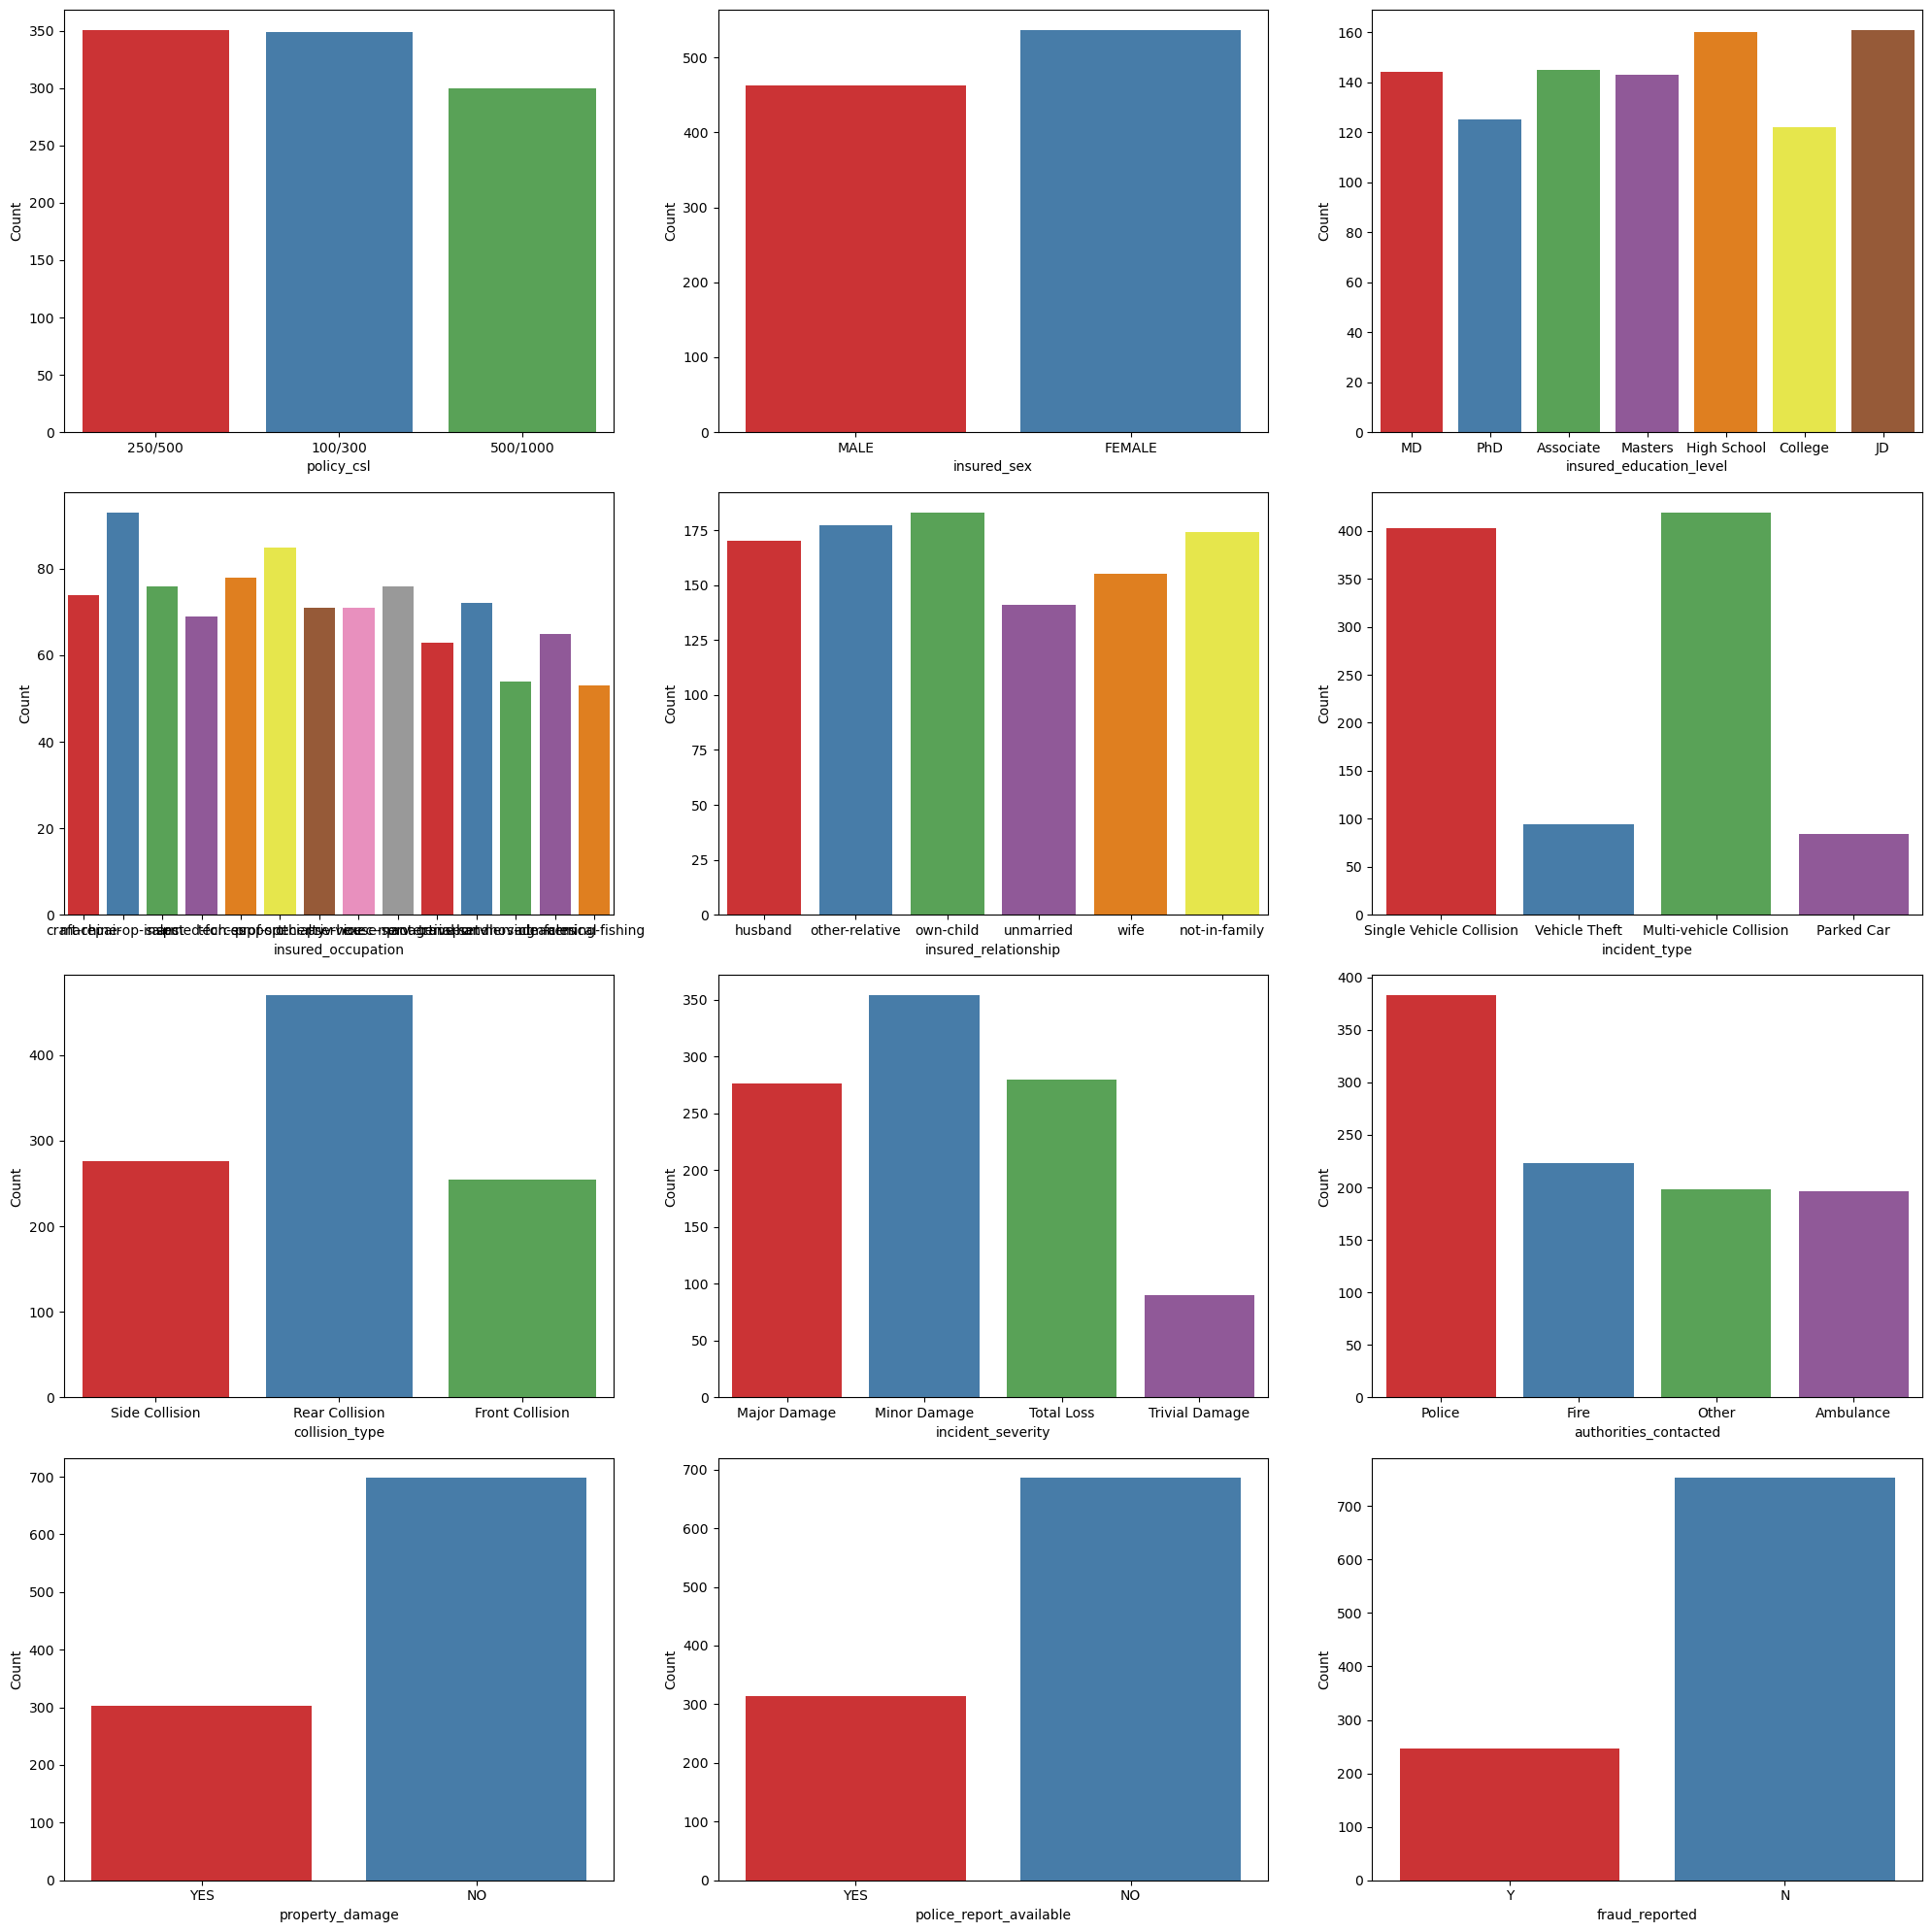

In [17]:
#Count of categories in each variable
plt.figure(figsize=(20, 20))
ind=1
for variable in categorical_EDA:
    plt.subplot(4,3,ind)
    sns.countplot(x=df2[variable],palette='Set1')
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

We ca see that the data is Imbalanced 

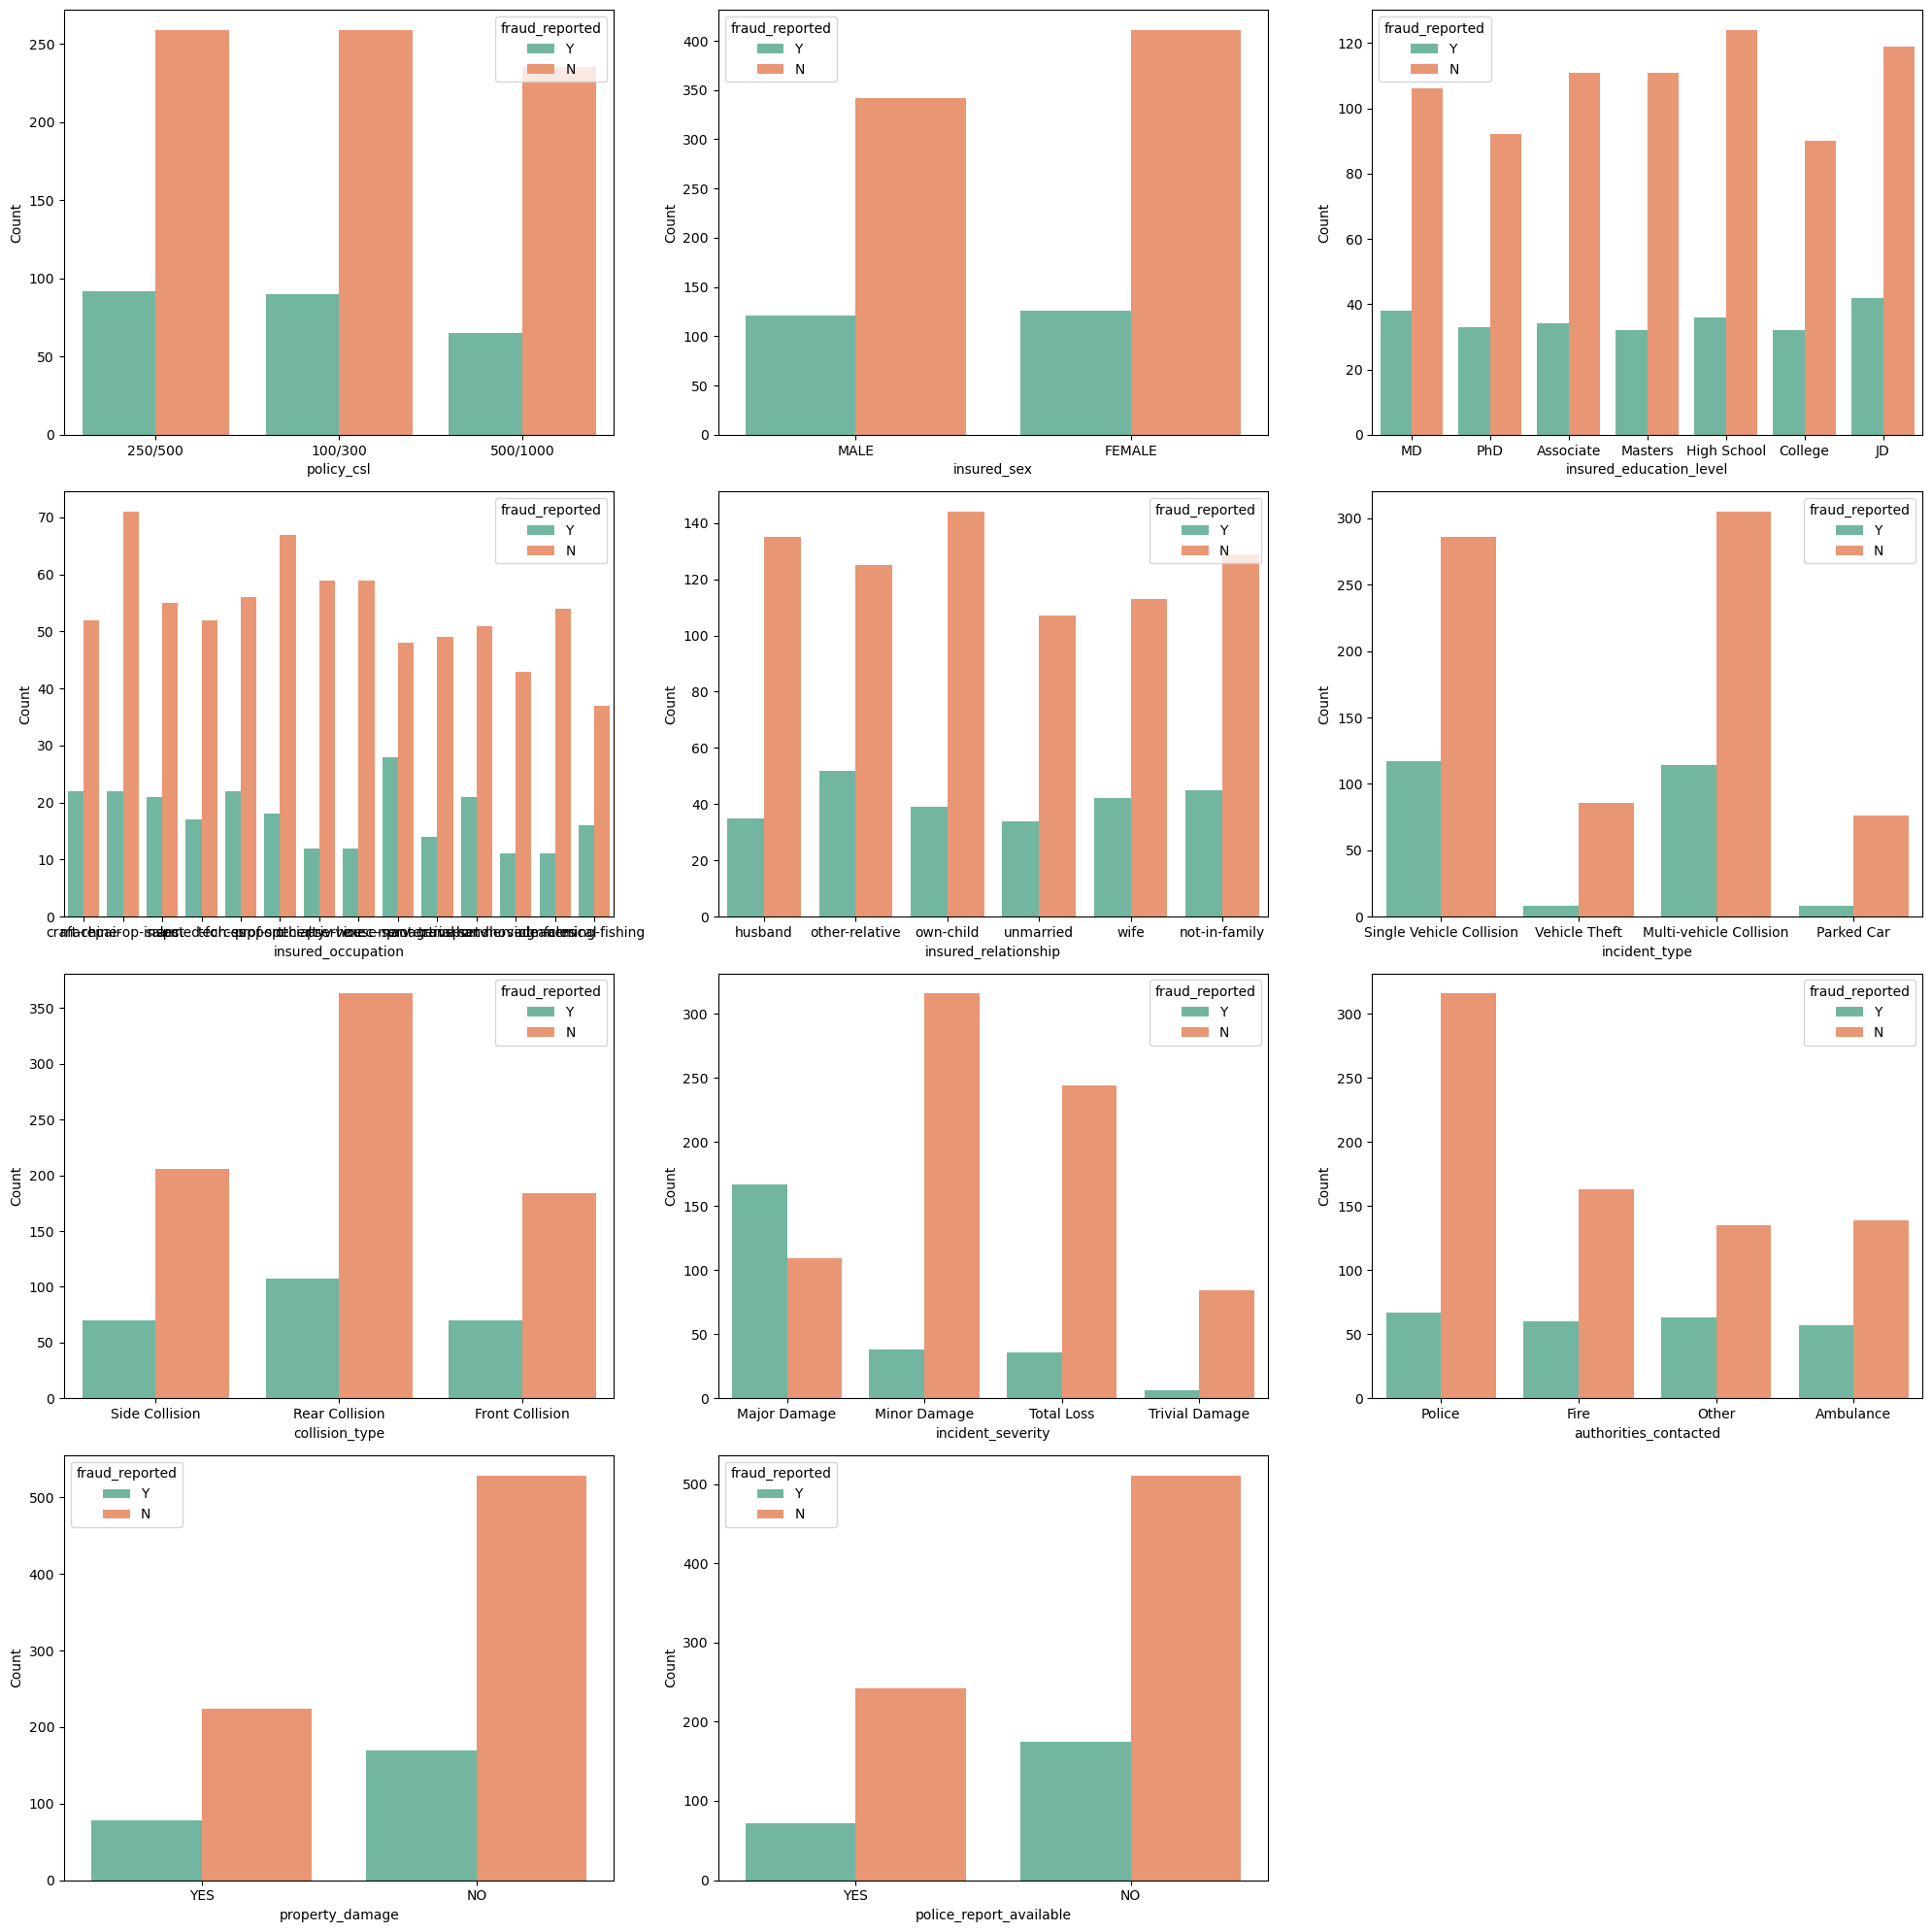

In [18]:
plt.figure(figsize=(20, 20))
ind=1
for variable in categorical_EDA[:11]:
    plt.subplot(4,3,ind)
    sns.countplot(x=df2[variable],palette='Set2',hue=df["fraud_reported"])
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

In [22]:
def plot_categorical_eda(df, categorical_columns, target_column):
    for col in categorical_columns:
        # Heatmap
        crosstab = pd.crosstab(df[col], df[target_column])
        plt.figure(figsize=(10, 6))
        sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
        plt.title(f'Heatmap of {col} vs {target_column}')
        plt.show()
        
        # Mosaic Plot
        plt.figure(figsize=(10, 6))
        mosaic(df, [col, target_column], title=f'Mosaic Plot of {col} vs {target_column}')
        plt.show()

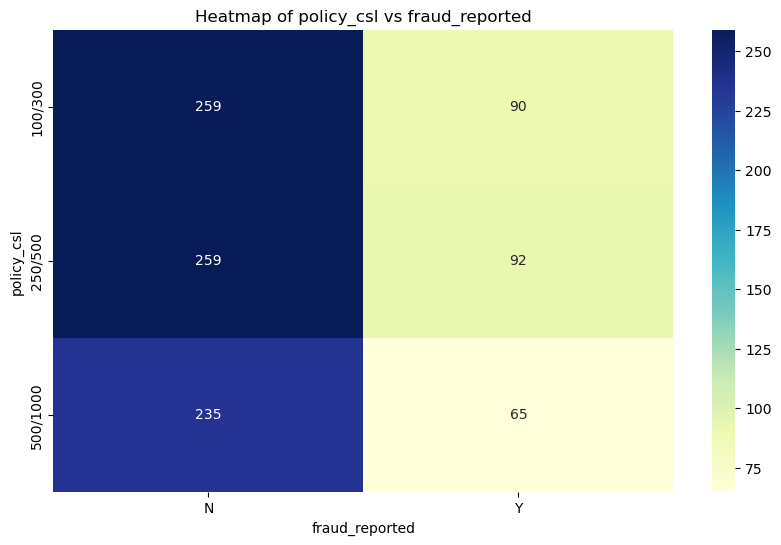

<Figure size 1000x600 with 0 Axes>

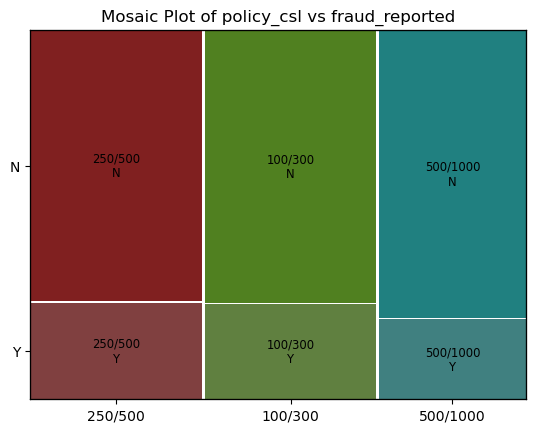

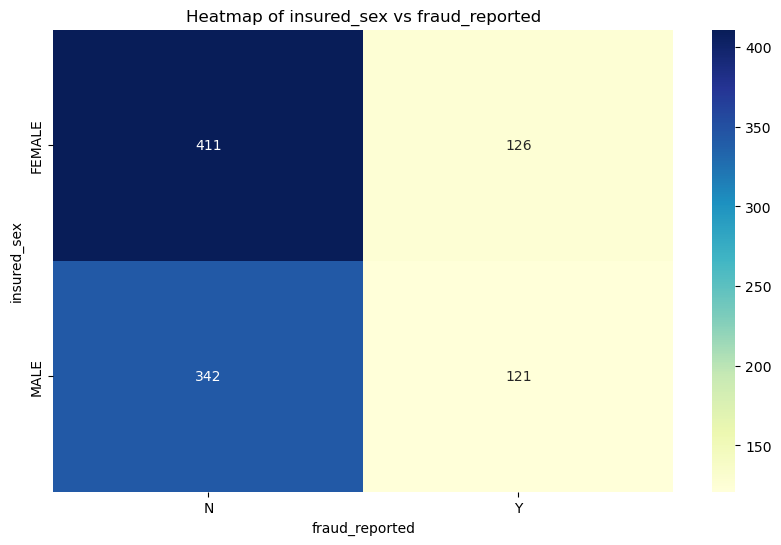

<Figure size 1000x600 with 0 Axes>

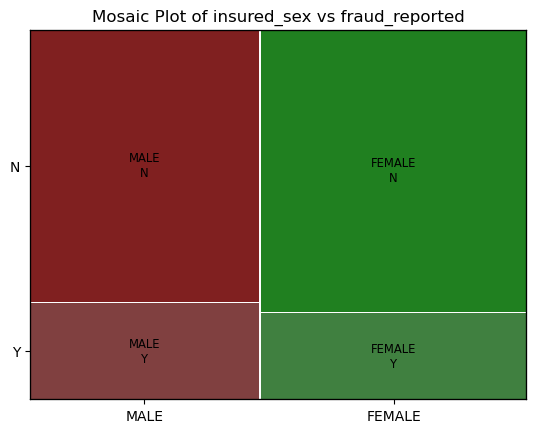

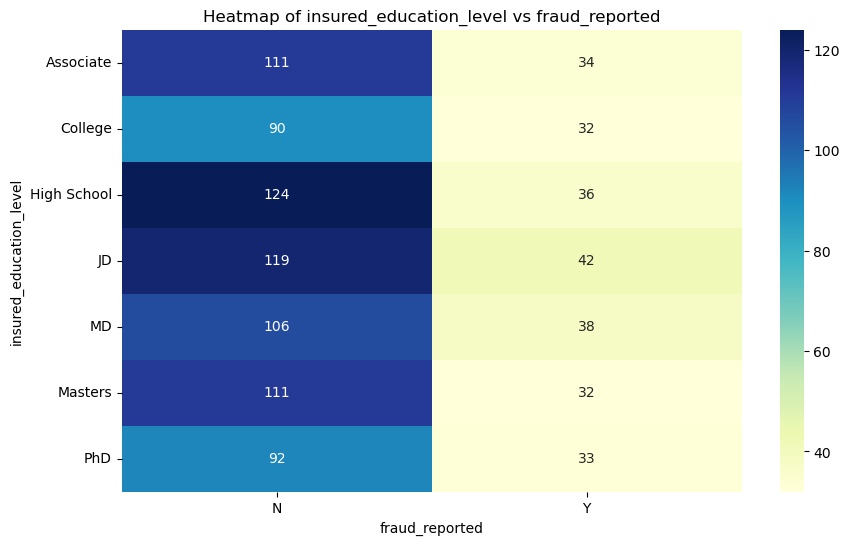

<Figure size 1000x600 with 0 Axes>

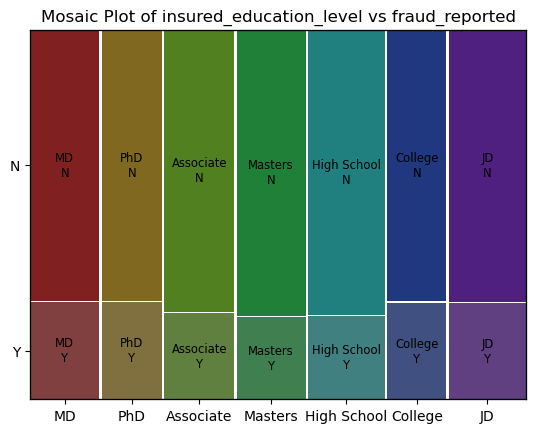

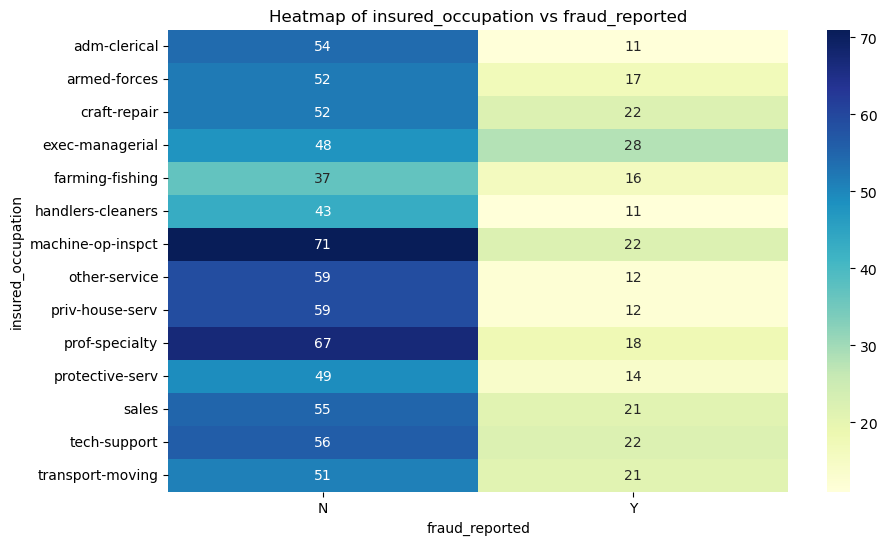

<Figure size 1000x600 with 0 Axes>

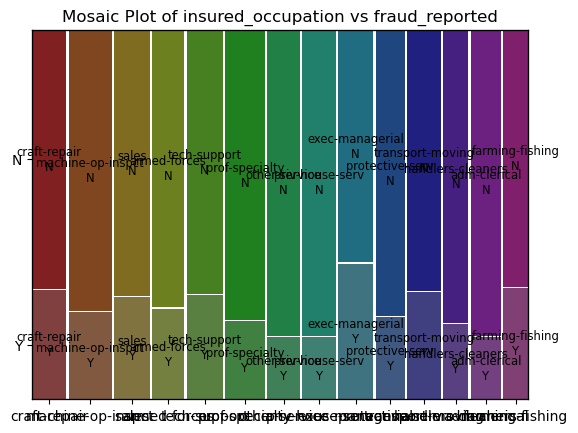

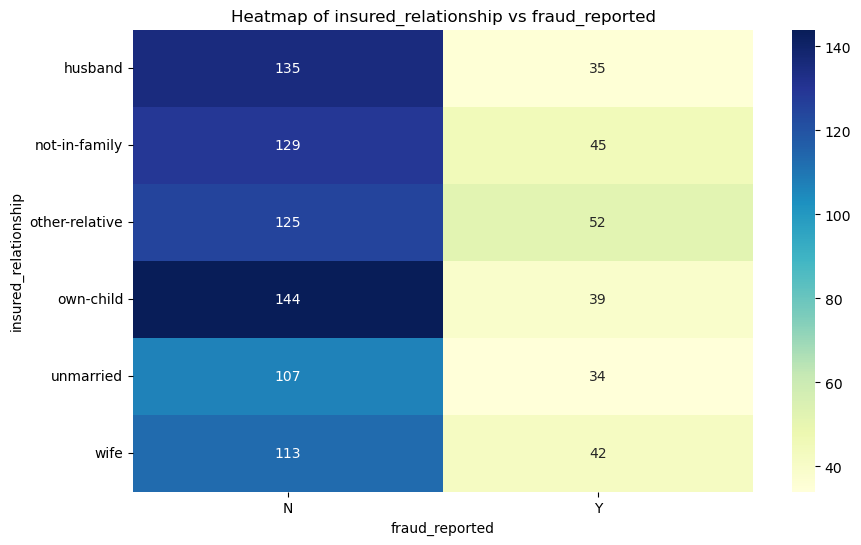

<Figure size 1000x600 with 0 Axes>

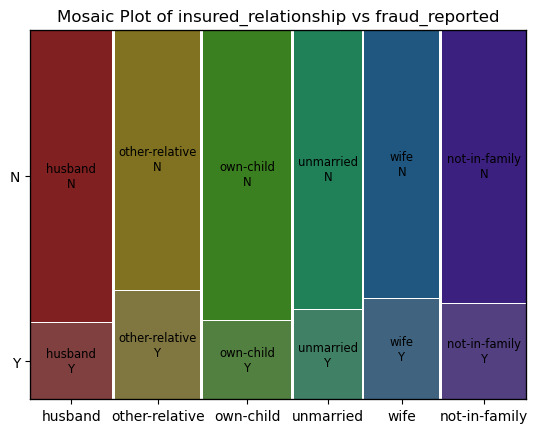

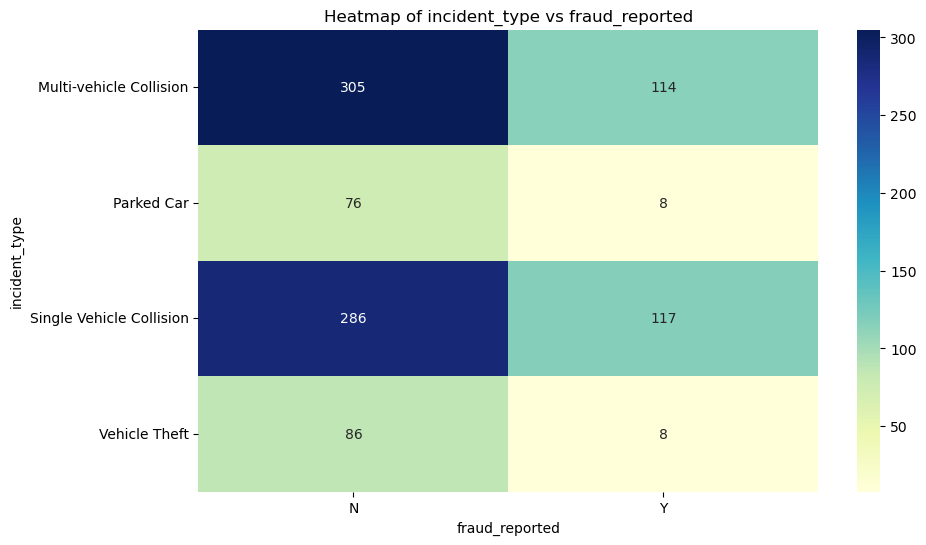

<Figure size 1000x600 with 0 Axes>

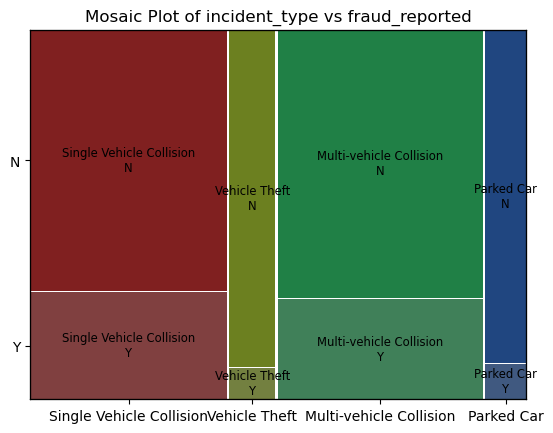

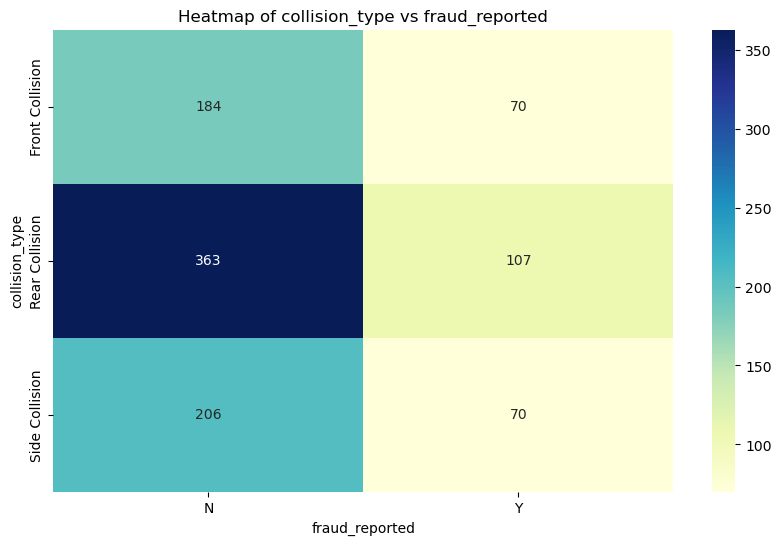

<Figure size 1000x600 with 0 Axes>

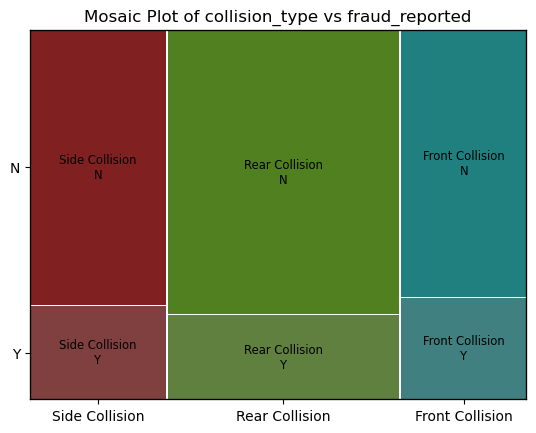

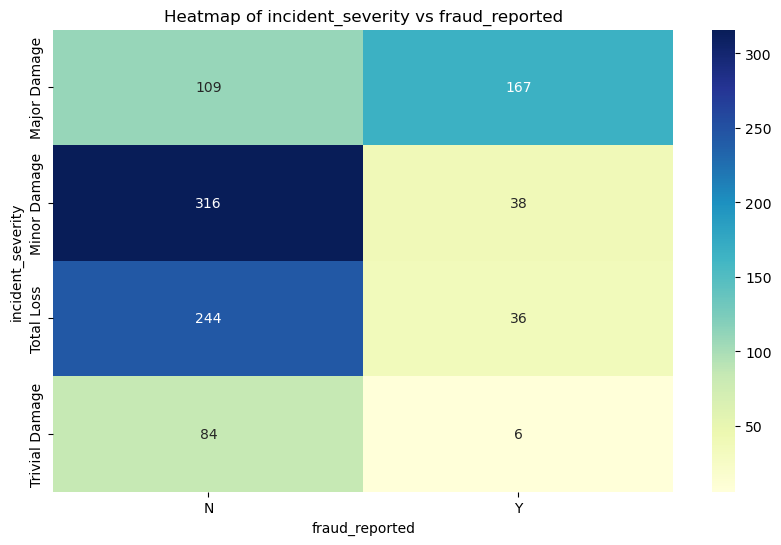

<Figure size 1000x600 with 0 Axes>

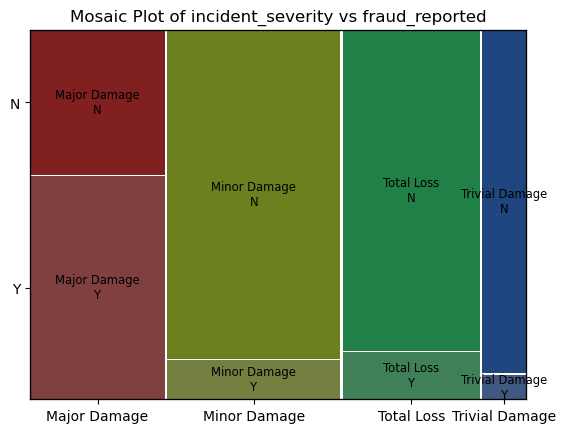

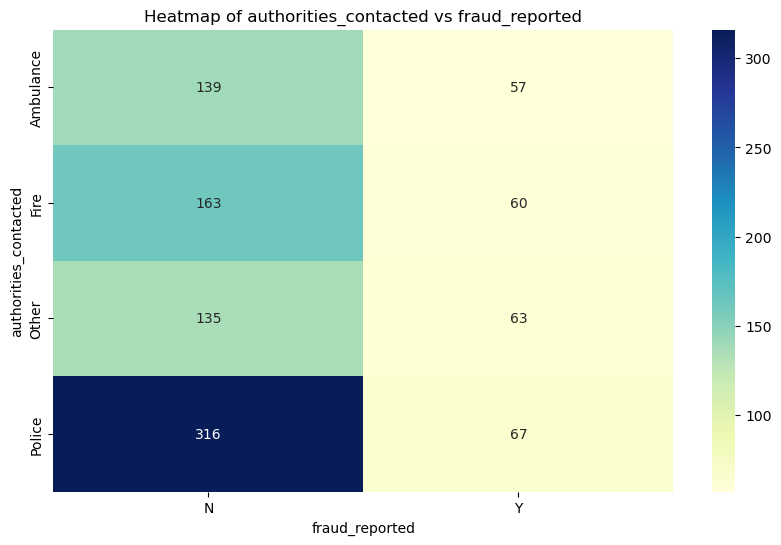

<Figure size 1000x600 with 0 Axes>

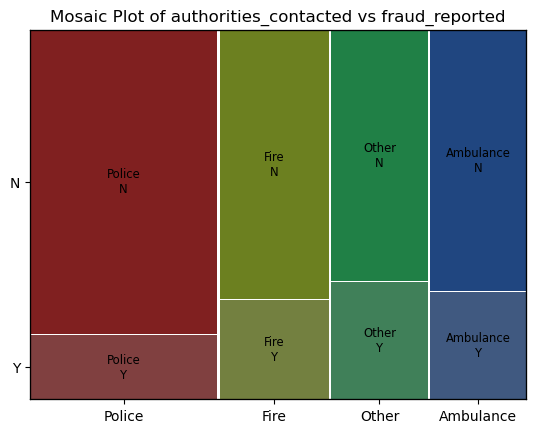

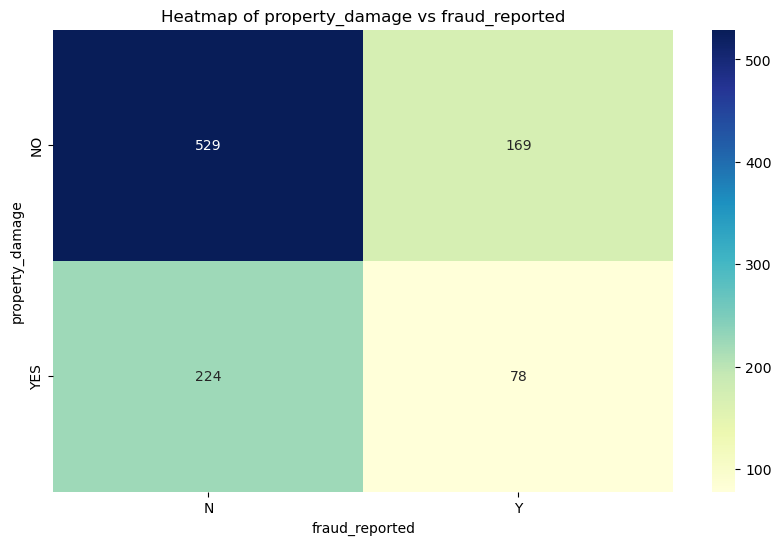

<Figure size 1000x600 with 0 Axes>

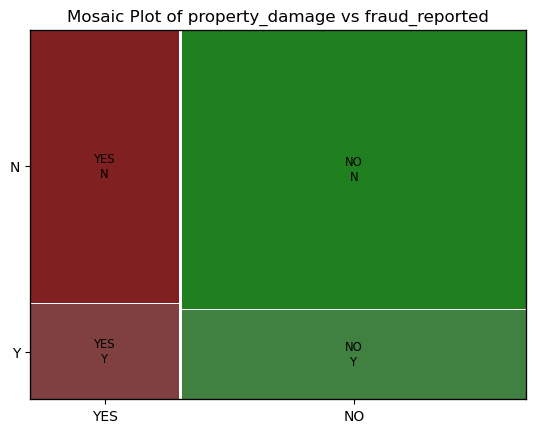

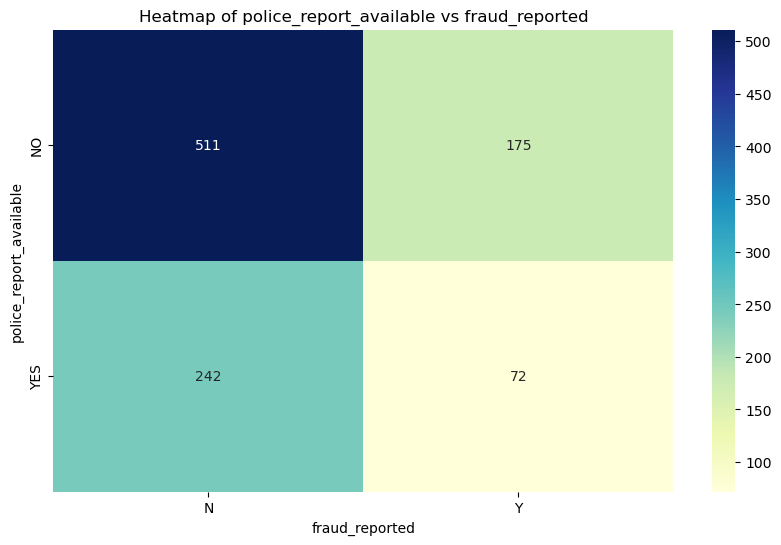

<Figure size 1000x600 with 0 Axes>

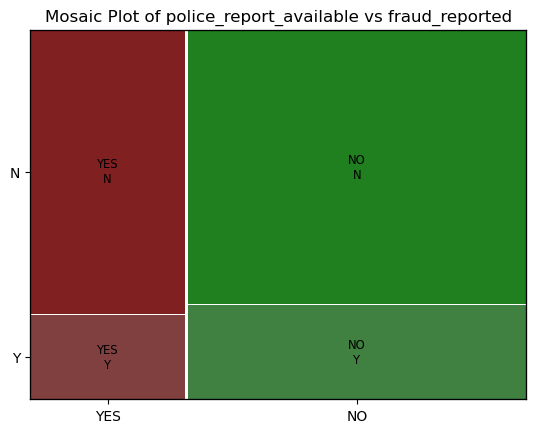

In [24]:
plot_categorical_eda(df2,categorical_EDA[:11], categorical_EDA[-1])

# Findings

- ploicy holders_cls with plans of 500/1000 have less number of frauds 
- males have higher fraudelent activity
- we ca see that people with education level college,Jd Occupation, MD and PHD are have high frequency of fraud 
- occupation level exec- managerial are has fraud detection
- insured in the name of othe relatives have higher fraud detection
- vehical colusion incidents have higher fraud rate
- front collision reported have high fraud rates
- we can see that the fraudelt activities occur when other autorities contact 
- fraudelent reports are when properties are damaged 


In [25]:
numerical_EDA = ['months_as_customer', 'age','policy_deductable','policy_annual_premium', 'umbrella_limit', 'capital-gains',
'capital-loss','incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
'total_claim_amount', 'injury_claim','property_claim', 'vehicle_claim']

In [26]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df2, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df2, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df2, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

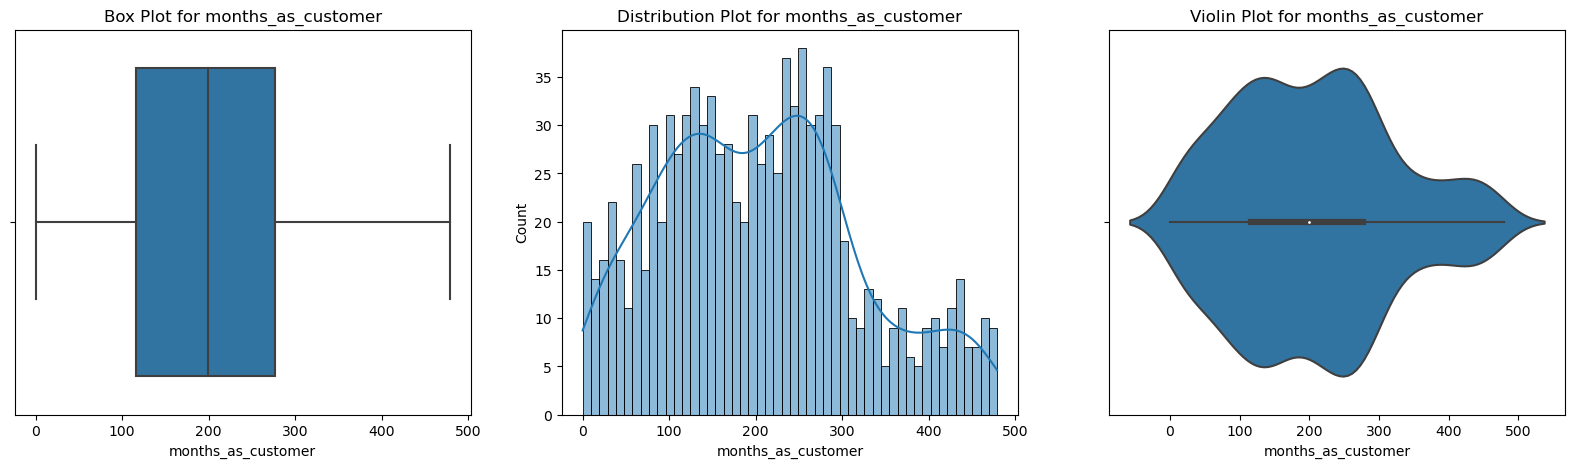

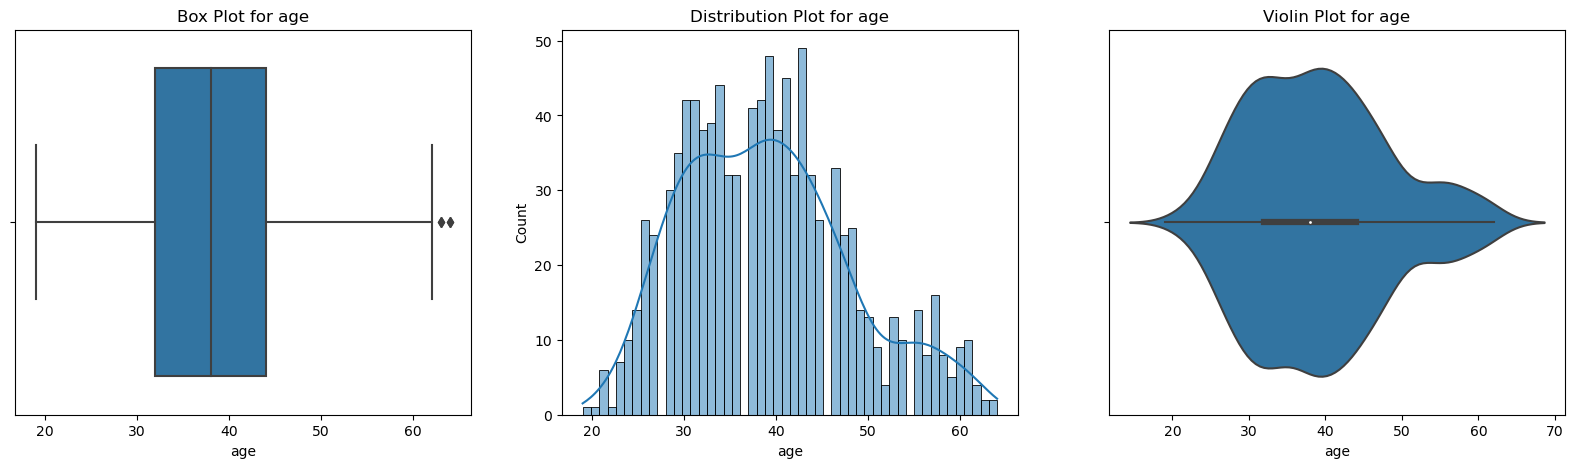

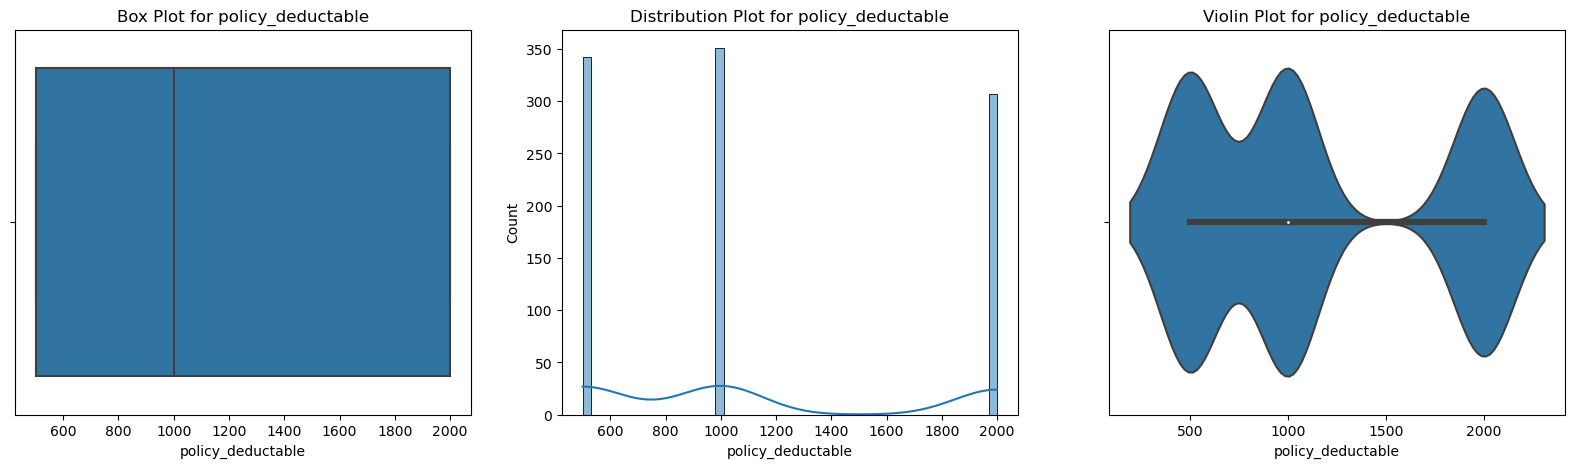

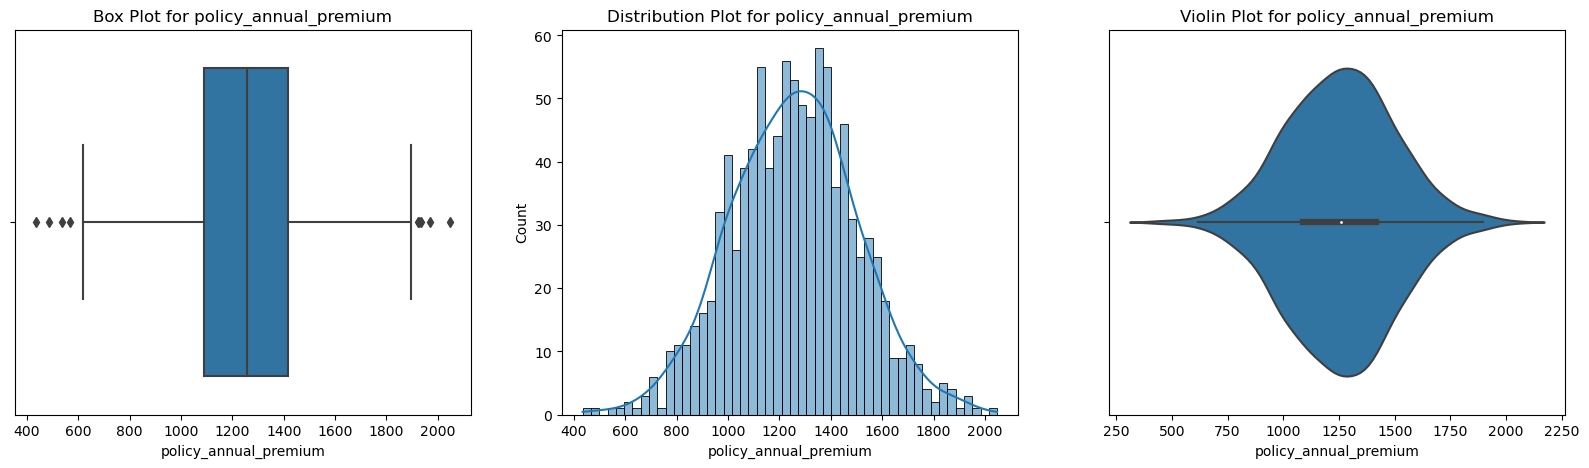

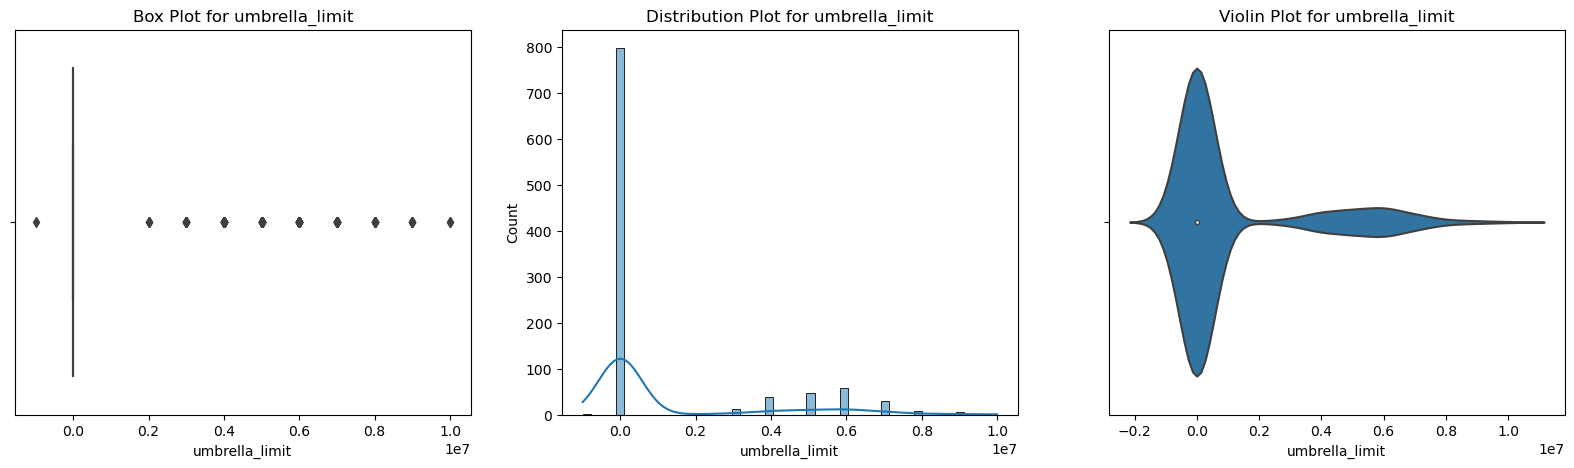

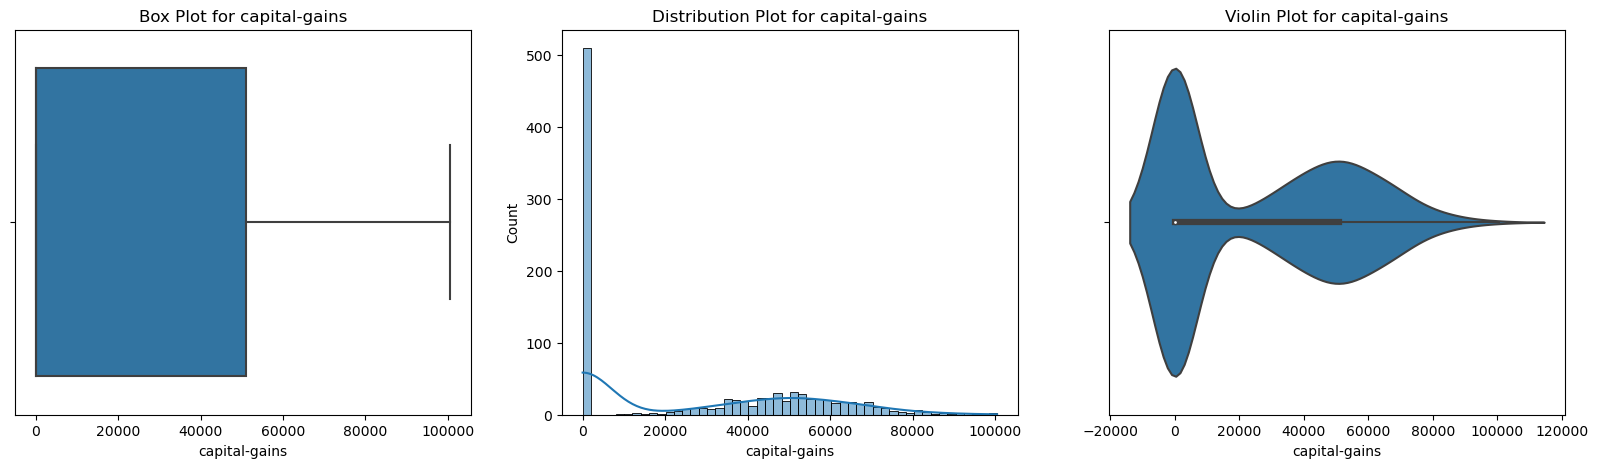

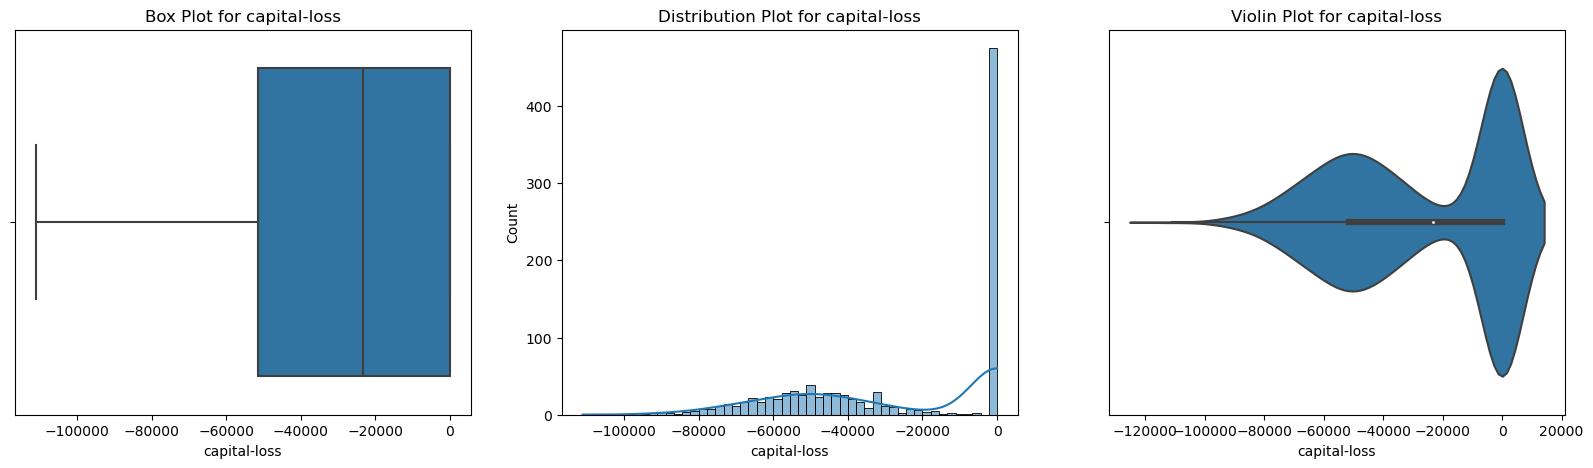

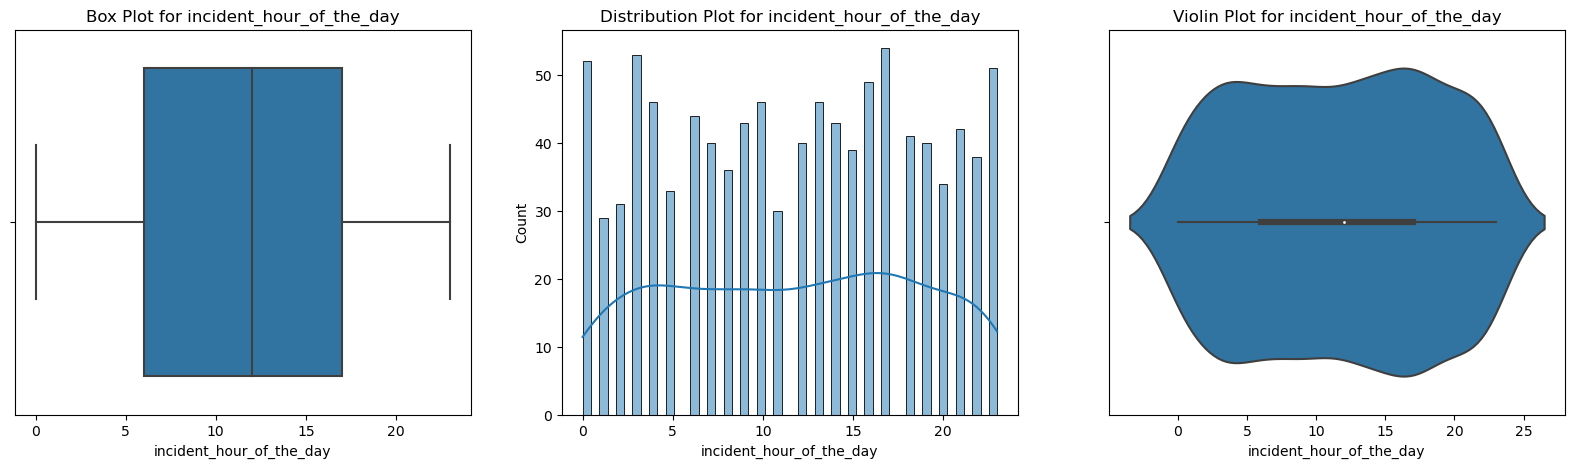

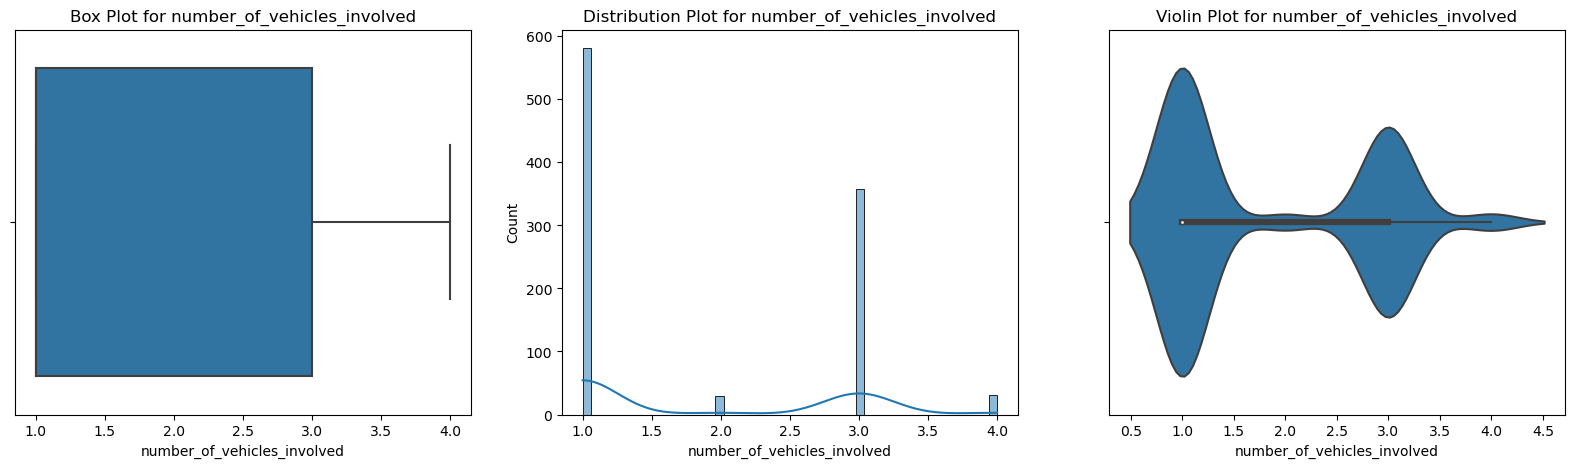

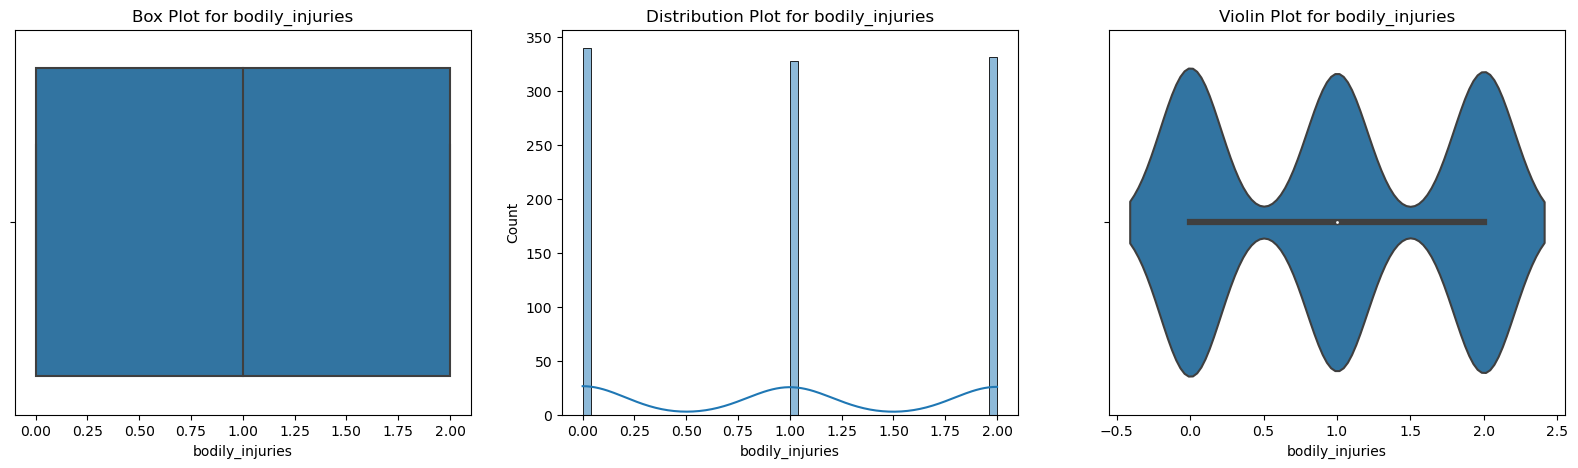

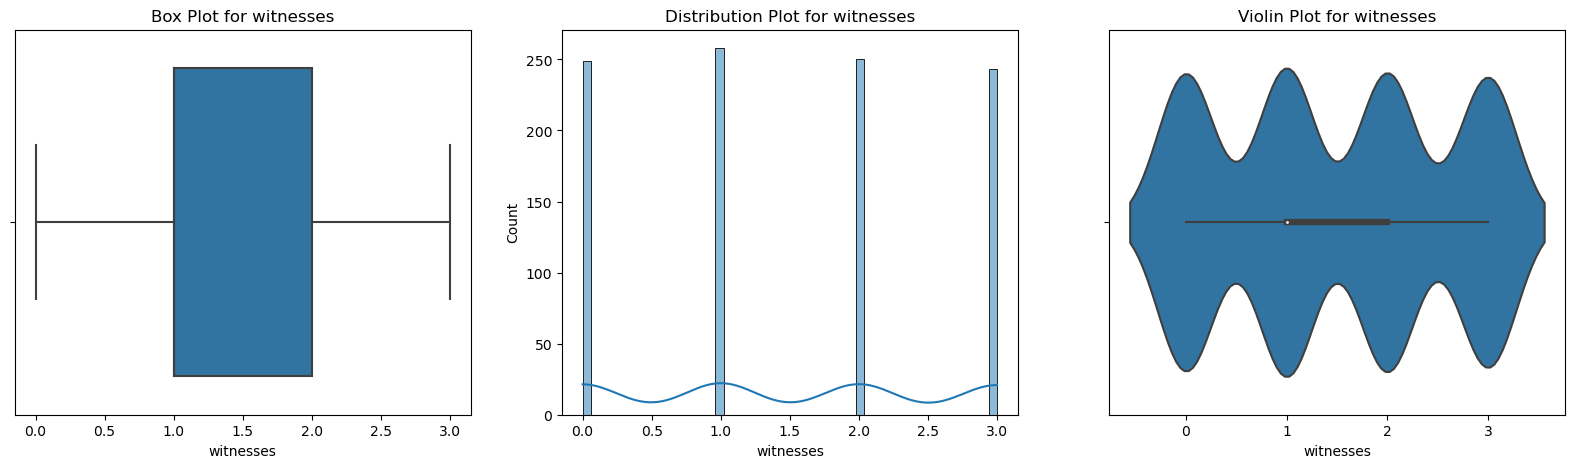

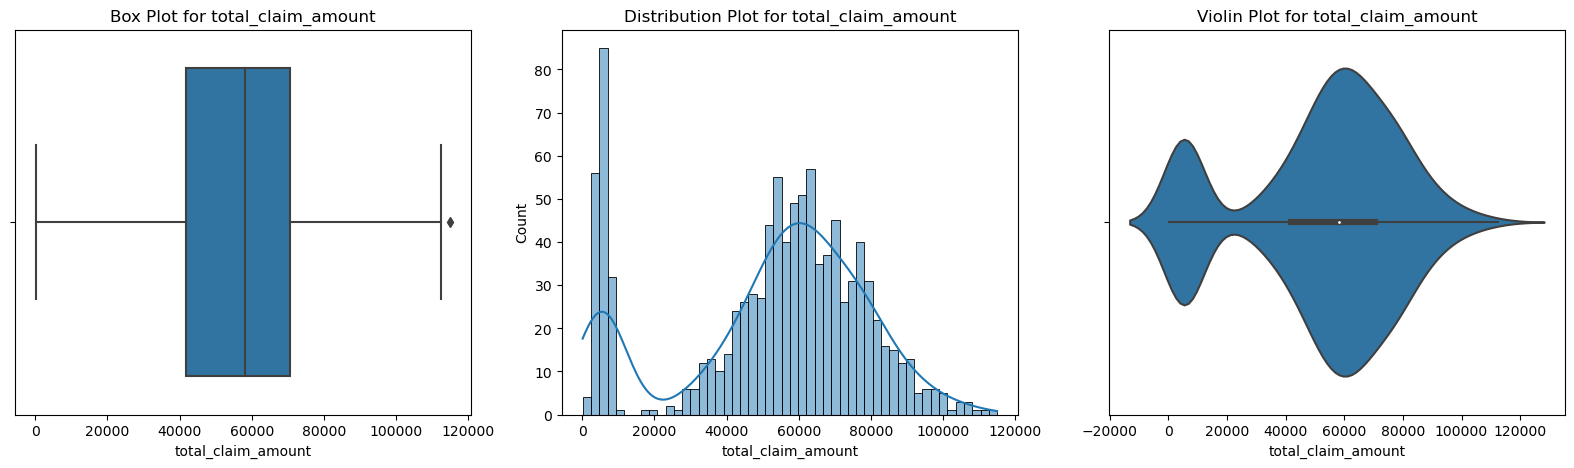

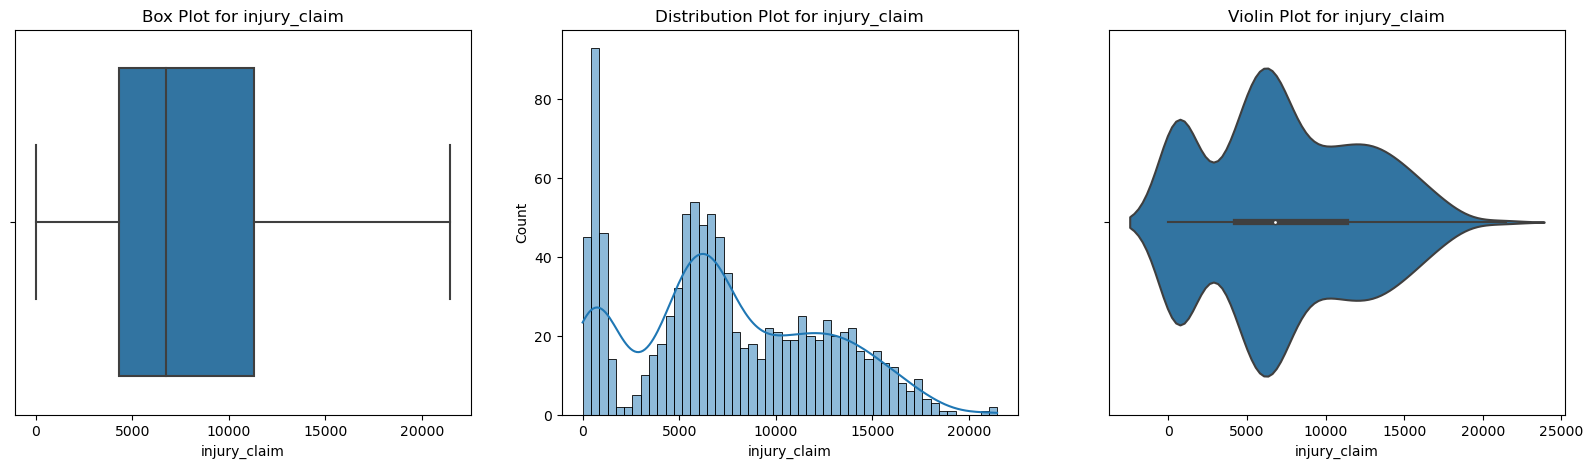

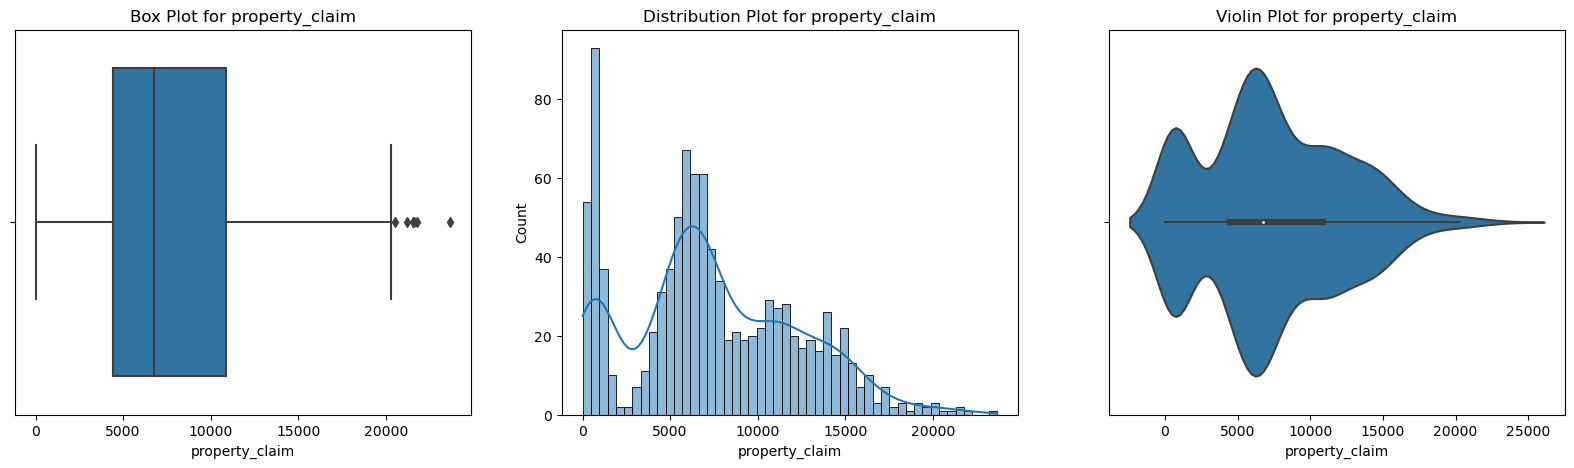

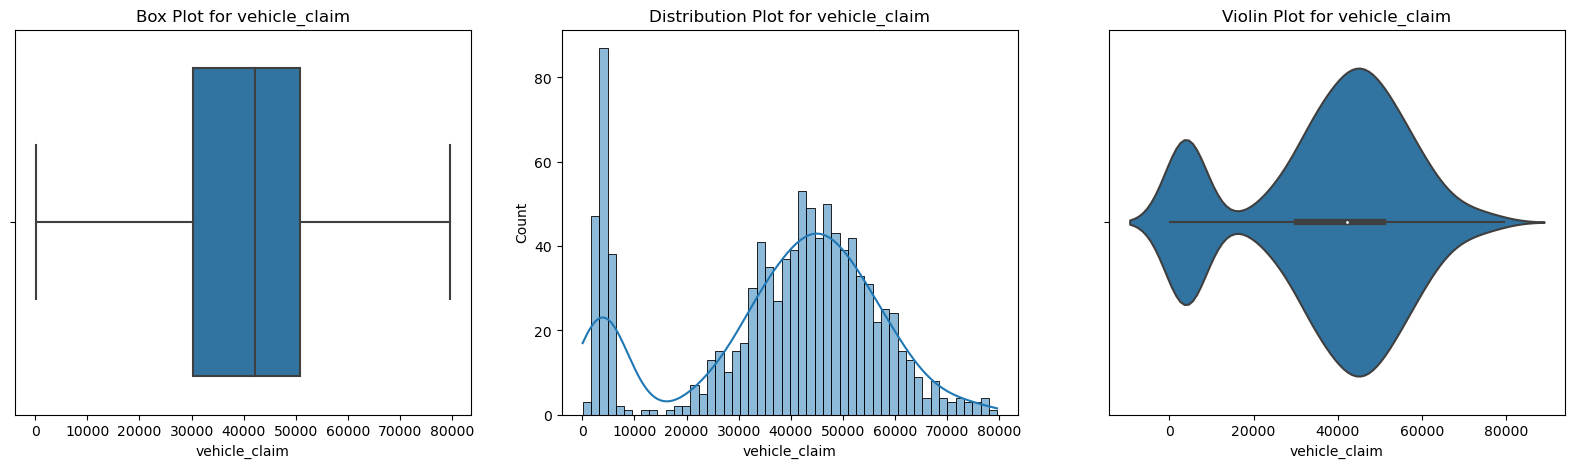

In [27]:
for i in numerical_EDA:
    plot(df2, i)

In [28]:
#Fixing Skewness
df2['injury_claim'] = np.log1p(df2['injury_claim'])
df2['property_claim'] = np.log1p(df2['property_claim'])

In [29]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [30]:
outlier(df2, 'age')
outlier(df2, 'policy_annual_premium')
outlier(df2, 'umbrella_limit')
outlier(df2, 'total_claim_amount')
outlier(df2, 'property_claim')

In [31]:
columns_cleaned = ['age','umbrella_limit','injury_claim','policy_annual_premium',
                  'total_claim_amount','property_claim']

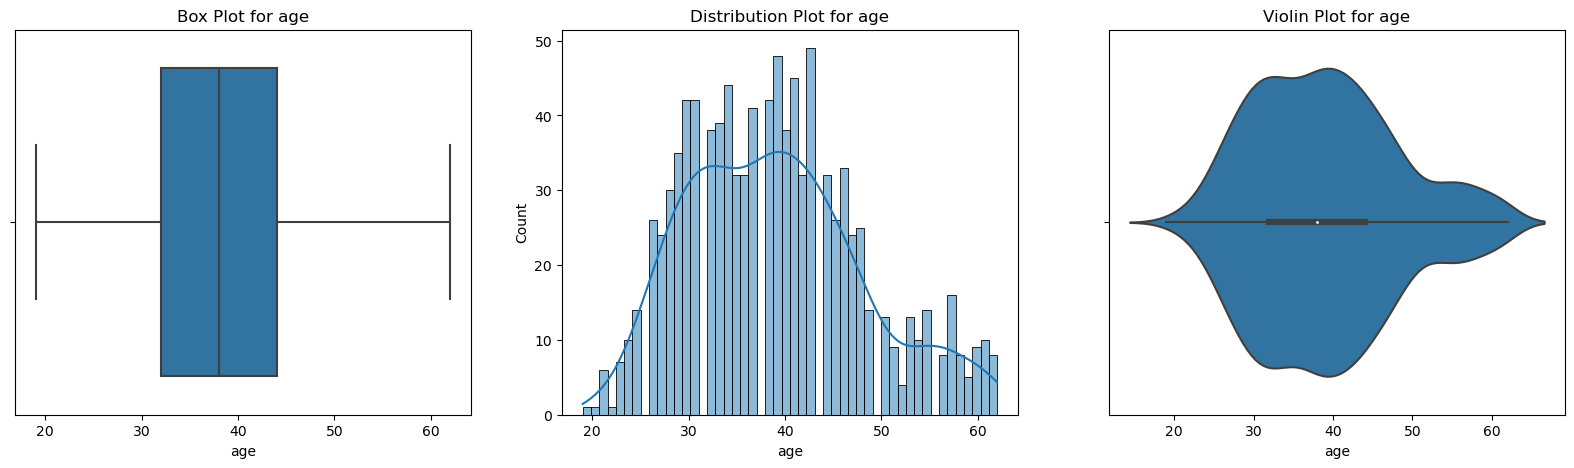

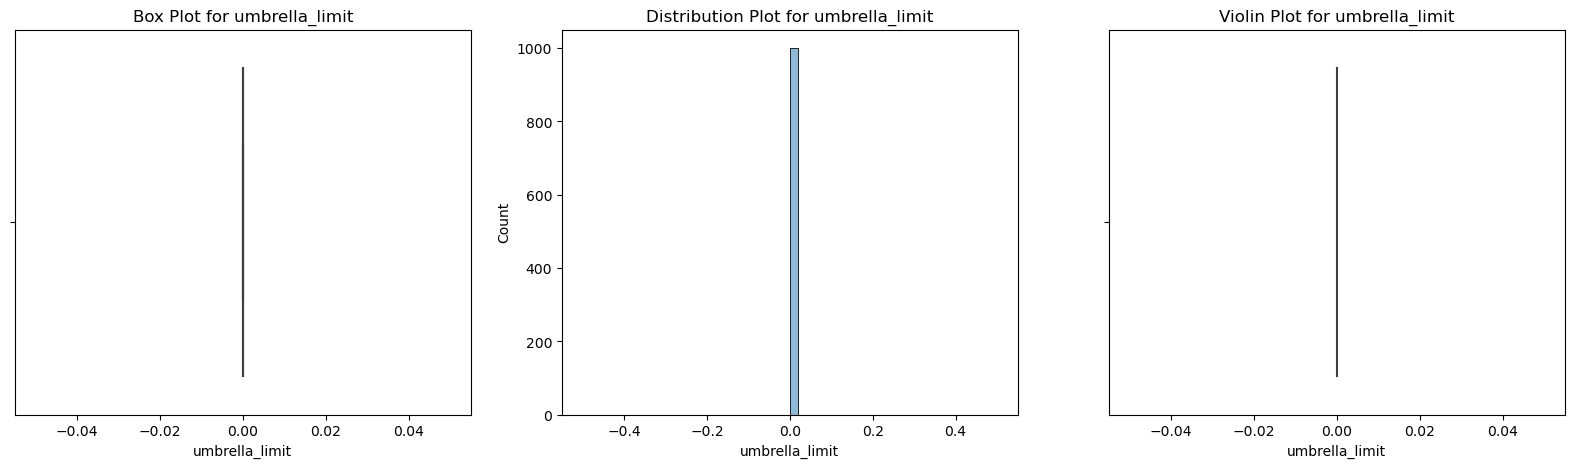

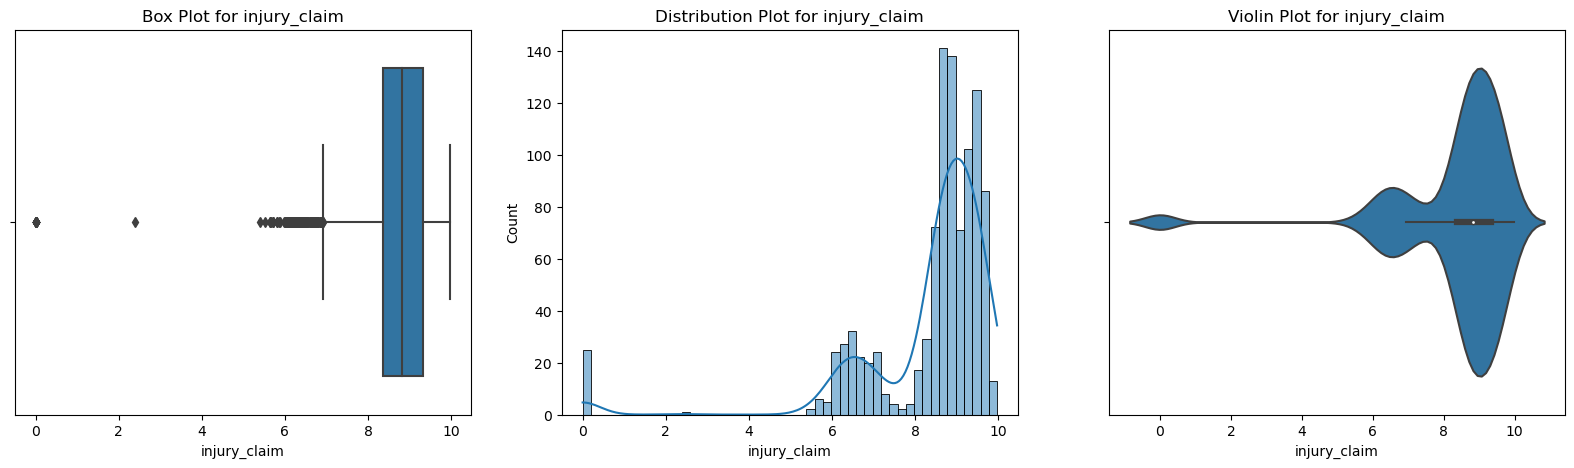

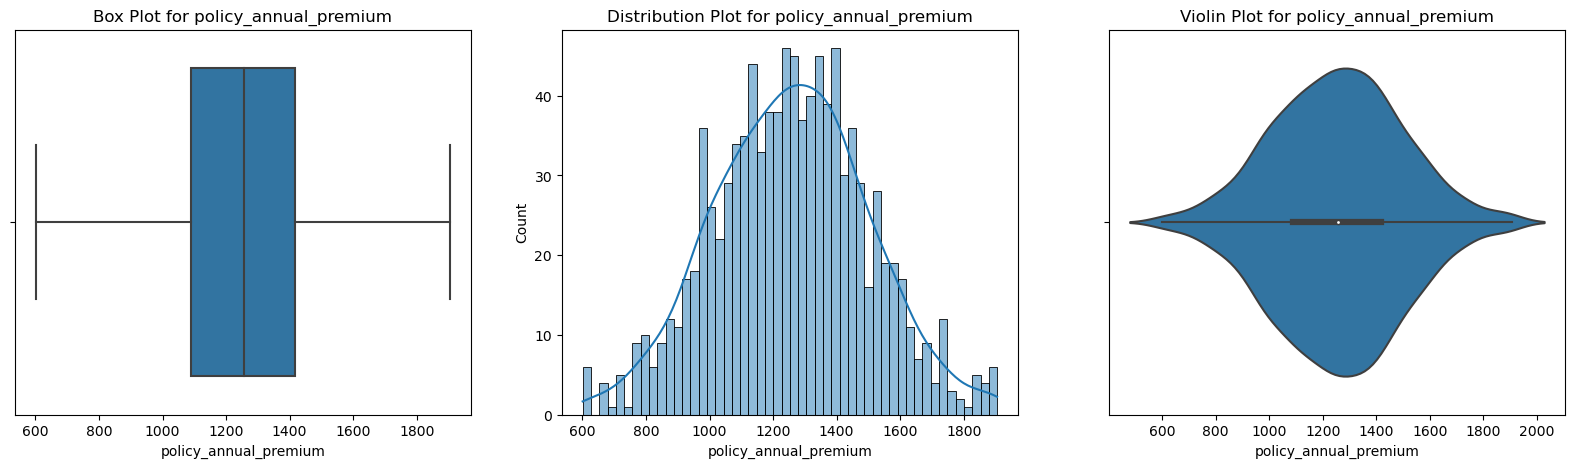

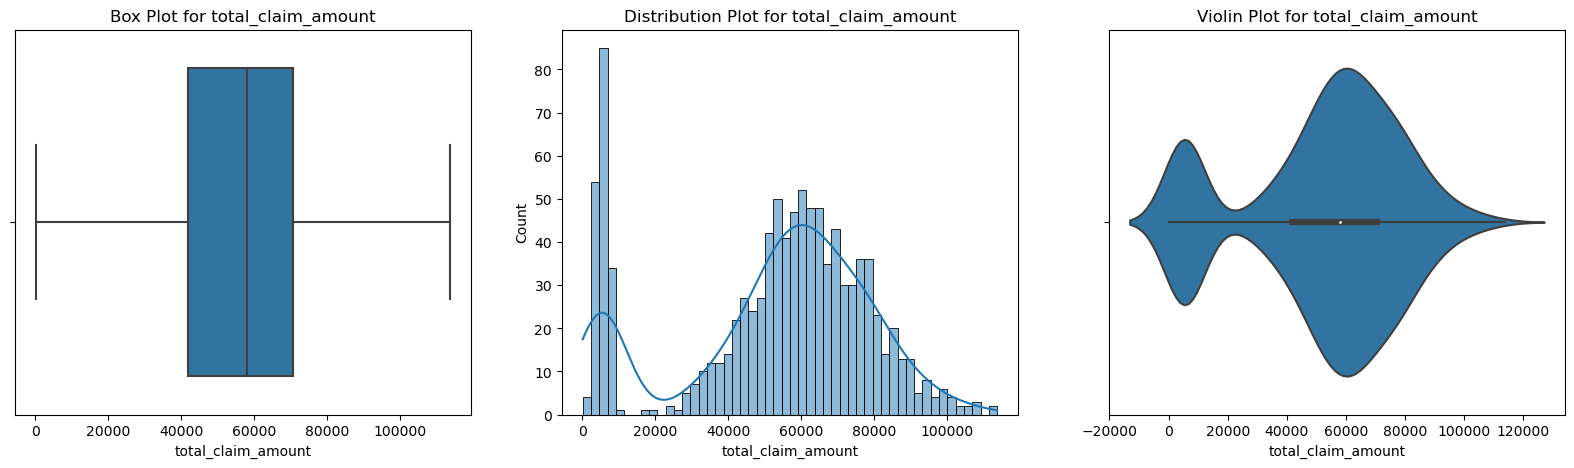

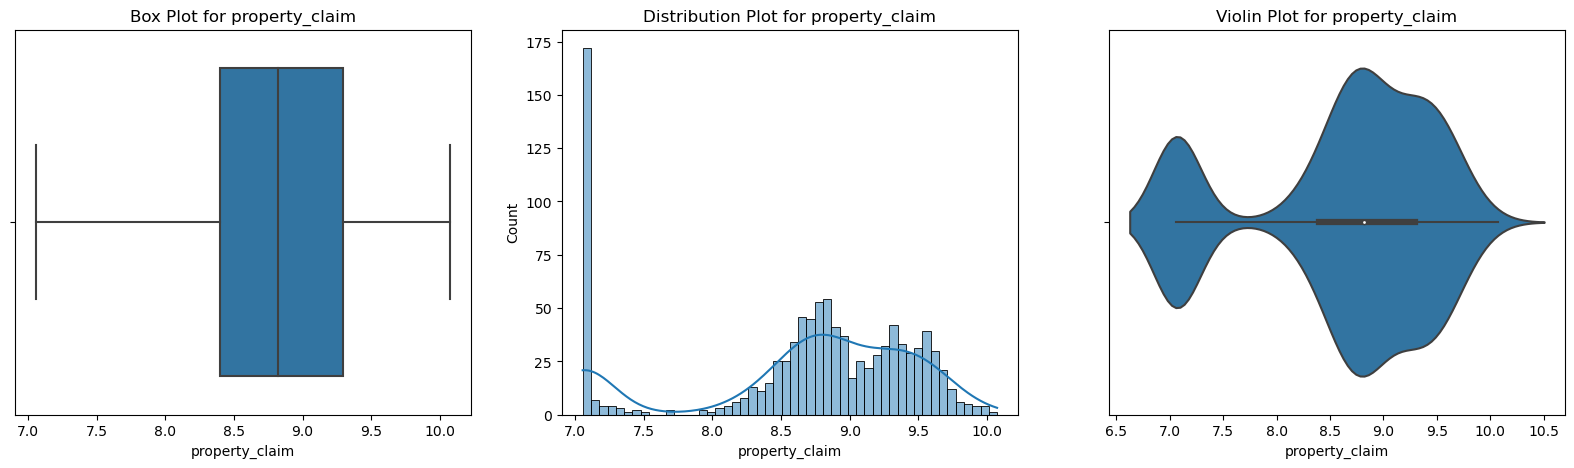

In [32]:
for i in columns_cleaned:
    plot(df2, i)

In [33]:
outlier(df2, 'injury_claim')

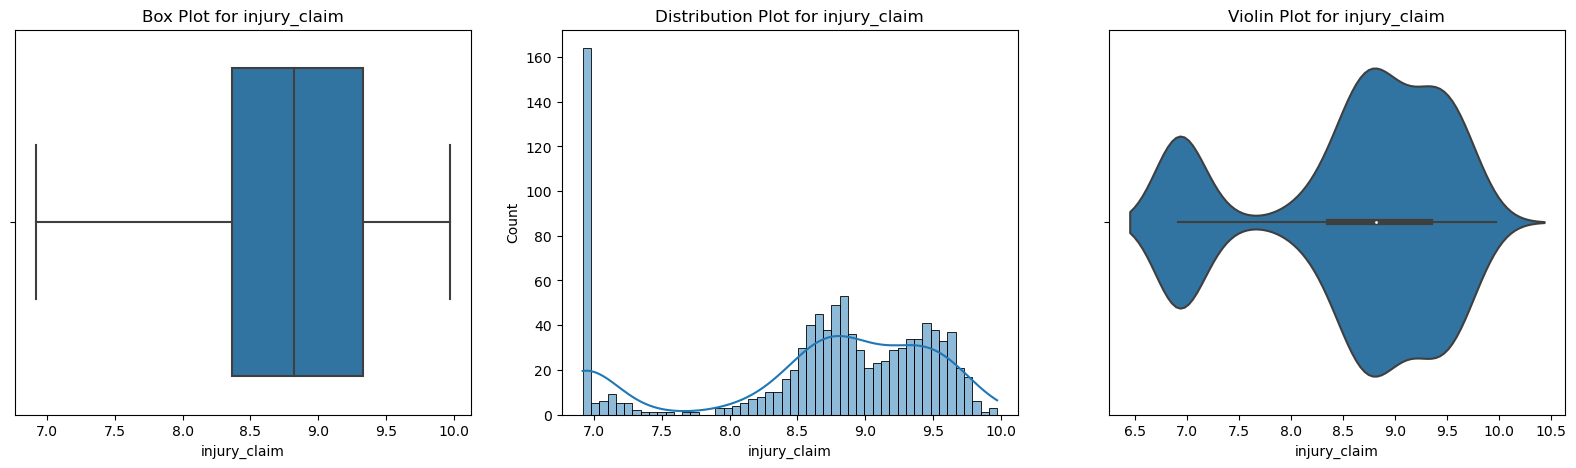

In [34]:
col = ['injury_claim']

for i in col:
    plot(df2, i)

In [35]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [36]:
def plot_numerical_eda(df, numerical_columns, target_column):
    for col in numerical_columns:
        plt.figure(figsize=(10, 6))
        
        # Point plot
        sns.pointplot(x=target_column, y=col, data=df, ci="sd")
        plt.title(f'Point plot of {col} by {target_column}')
        plt.xlabel(target_column)
        plt.ylabel(col)
        plt.show()
        
        # Bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x=target_column, y=col, data=df, estimator=np.mean)
        plt.title(f'Bar plot of {col} by {target_column}')
        plt.xlabel(target_column)
        plt.ylabel(col)
        plt.show()
        
        # Box plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=target_column, y=col, data=df)
        plt.title(f'Box plot of {col} by {target_column}')
        plt.xlabel(target_column)
        plt.ylabel(col)
        plt.show()

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


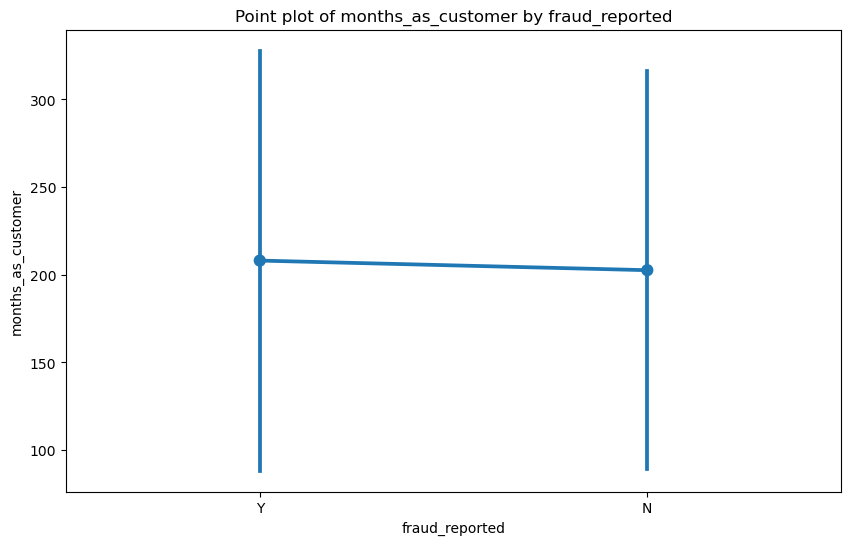

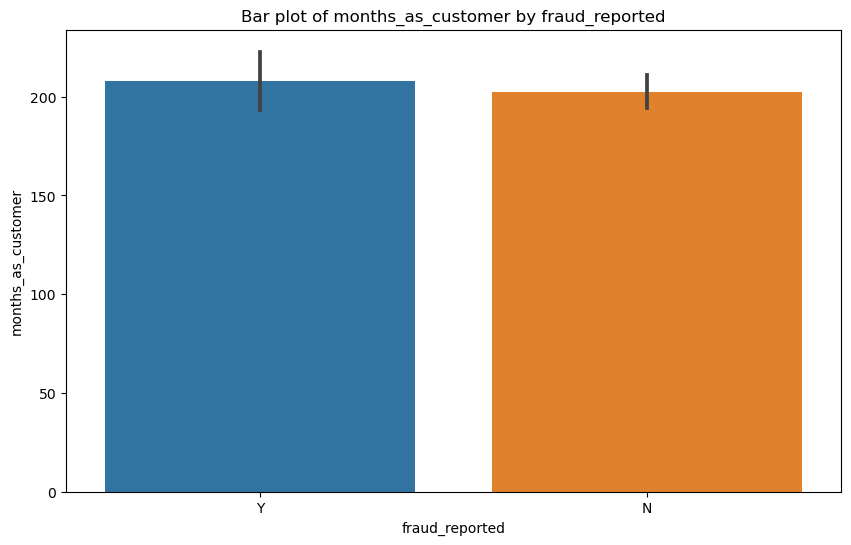

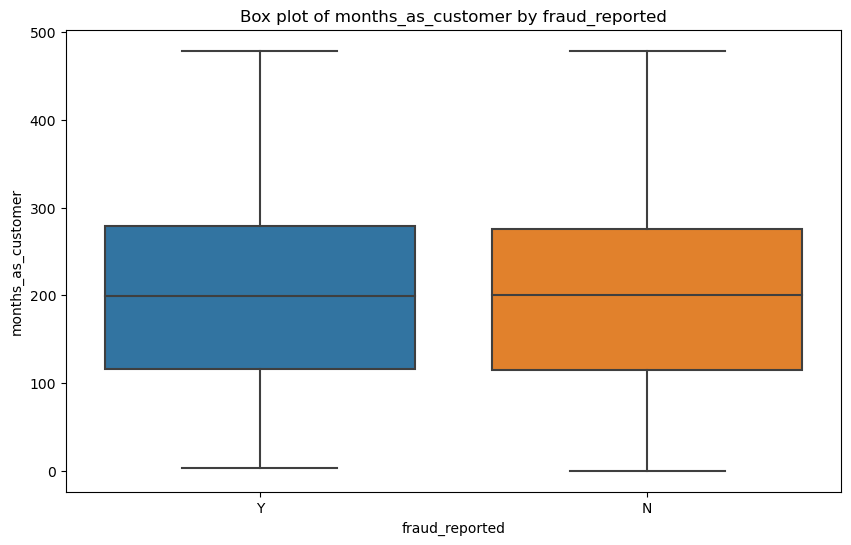

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


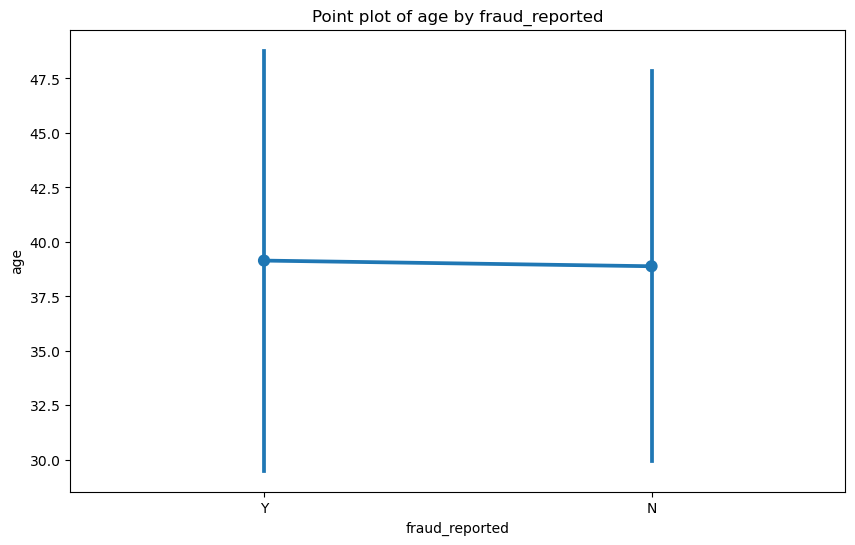

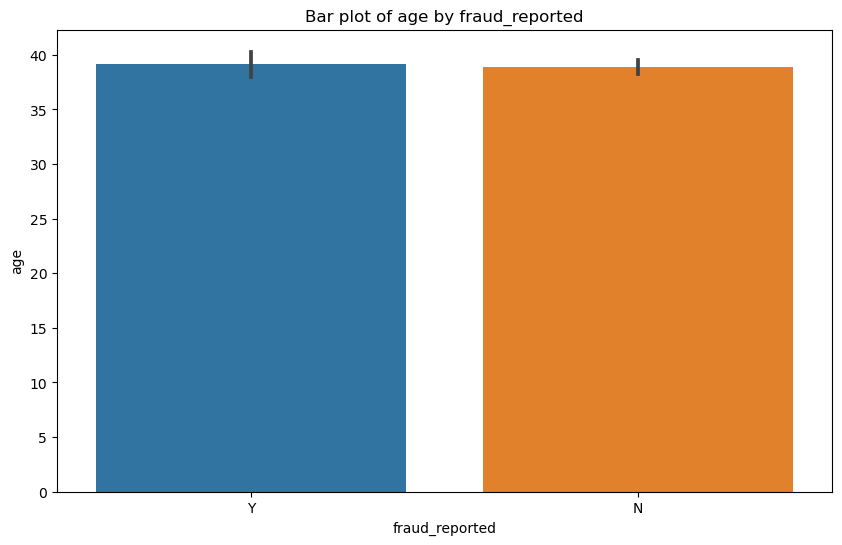

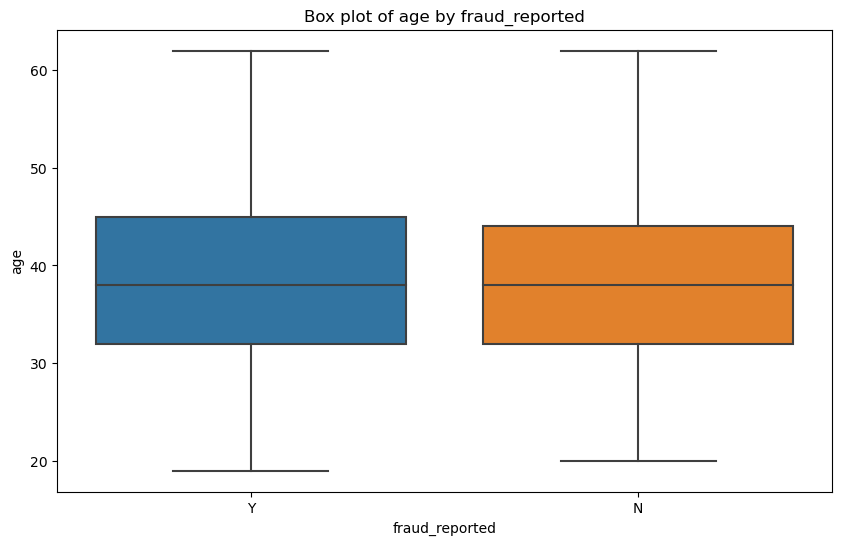

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


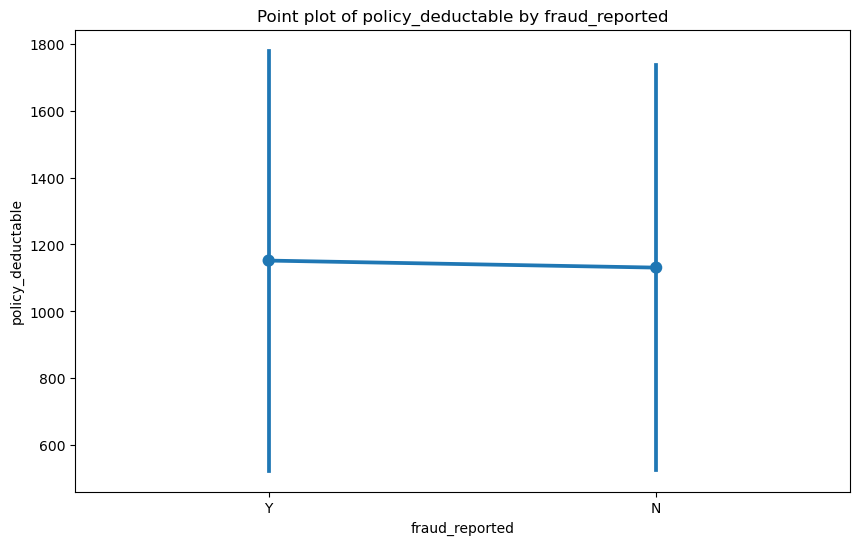

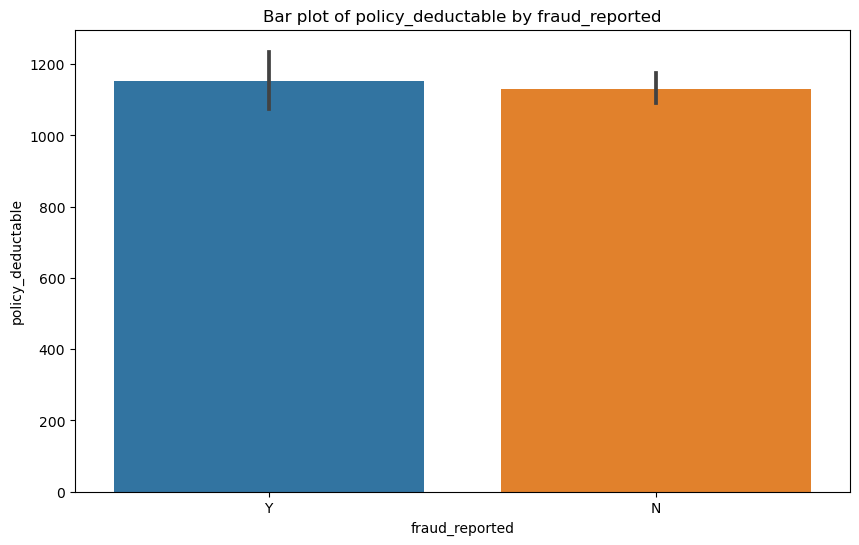

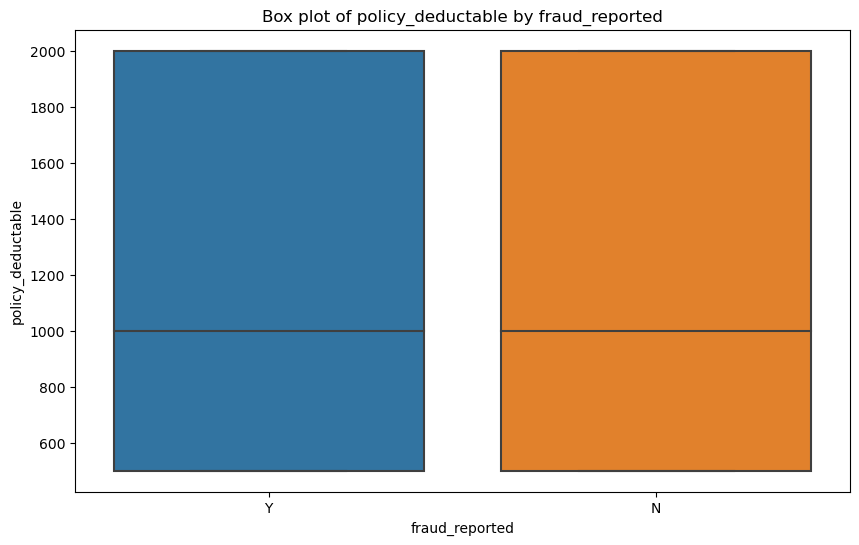

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


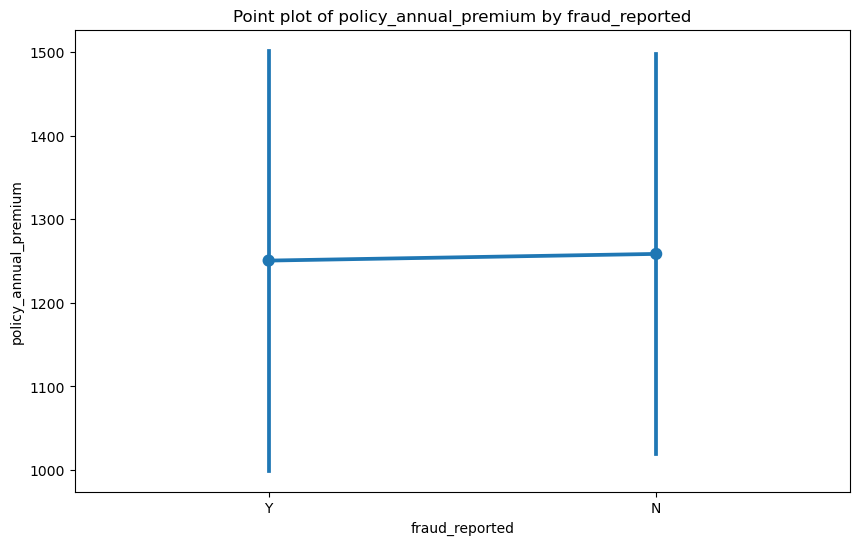

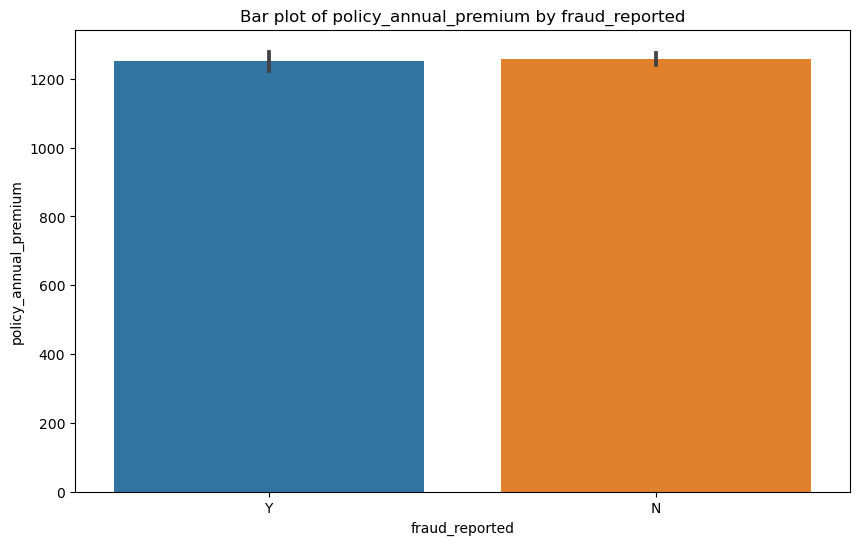

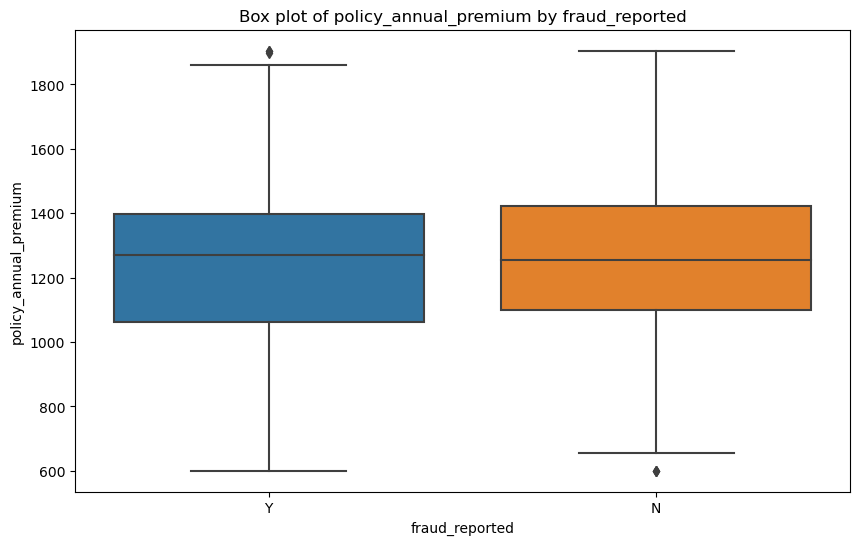

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


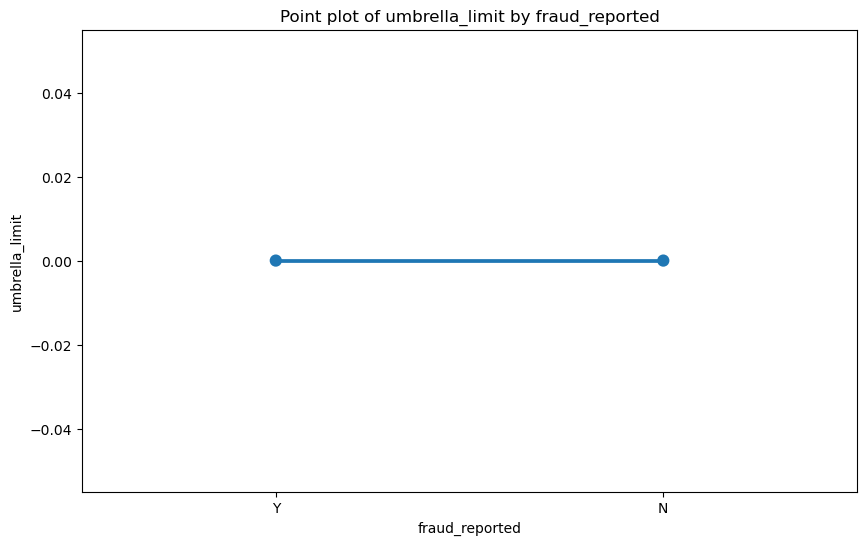

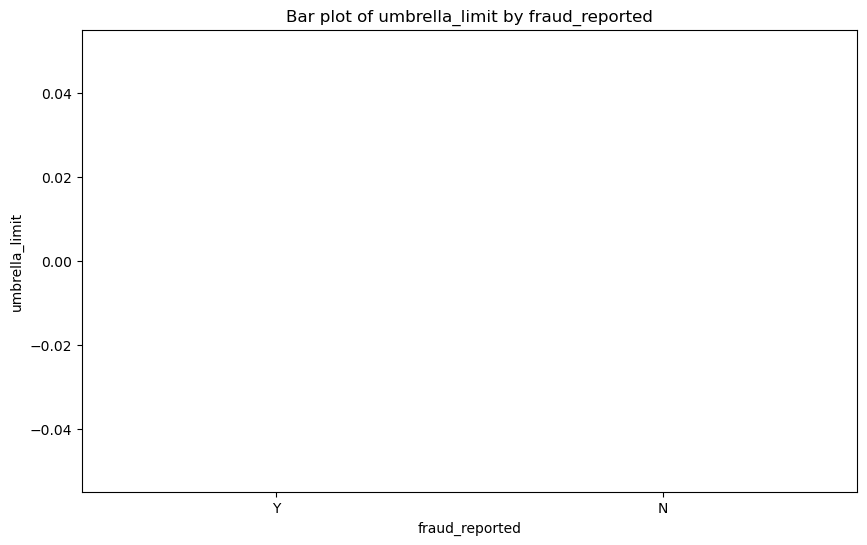

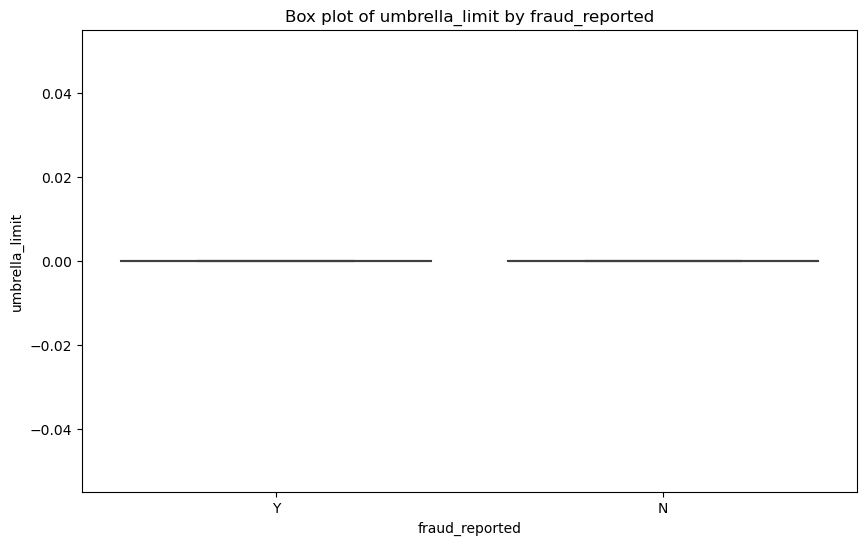

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


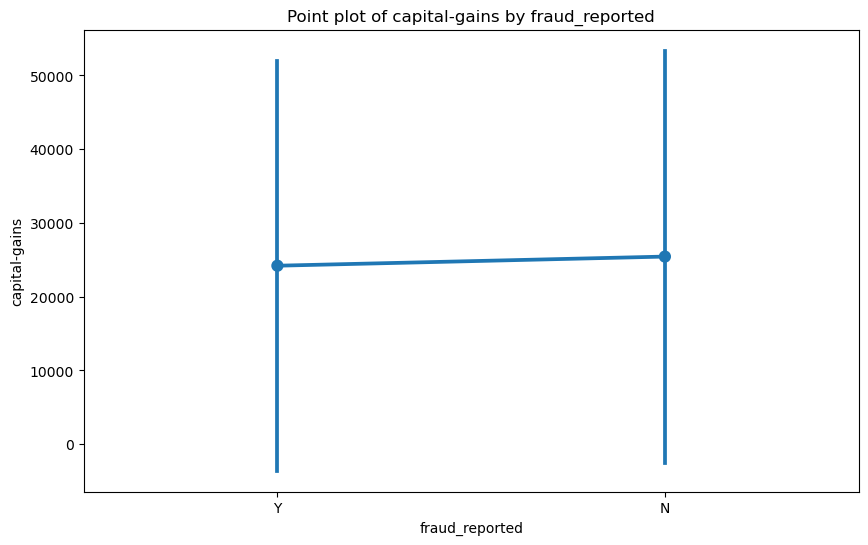

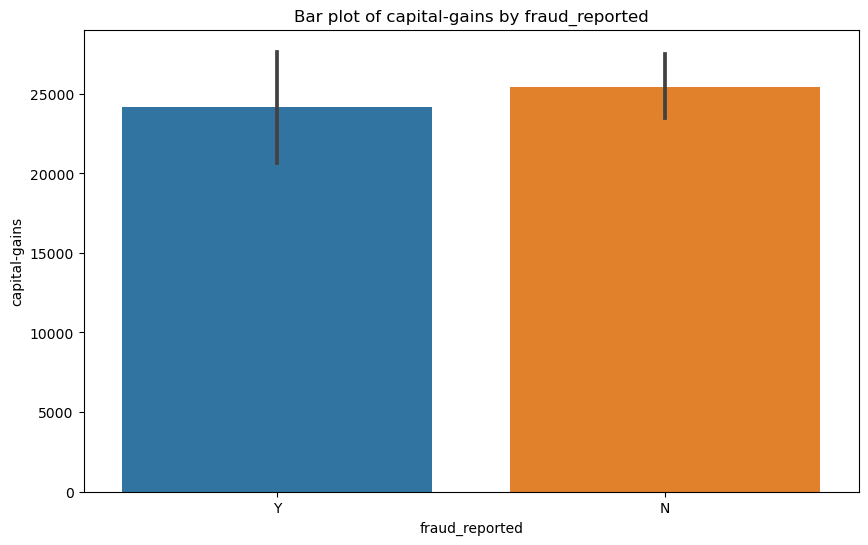

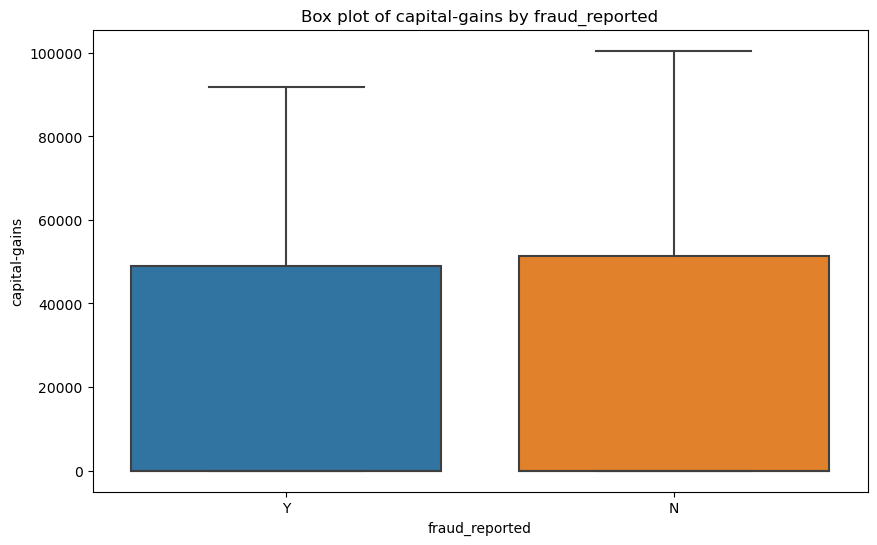

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


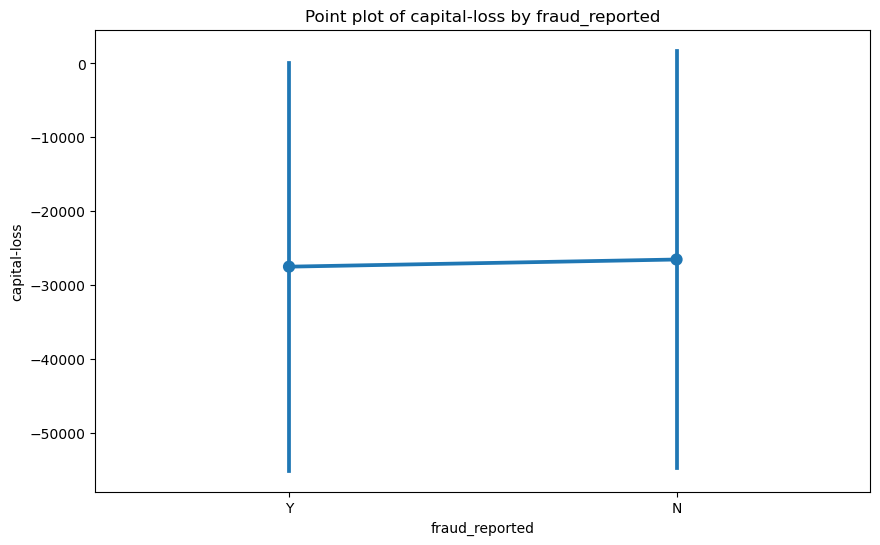

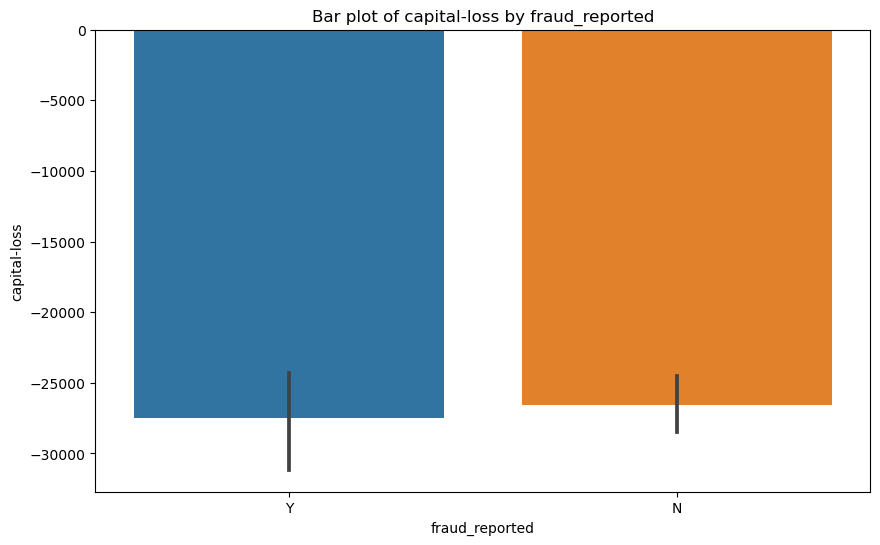

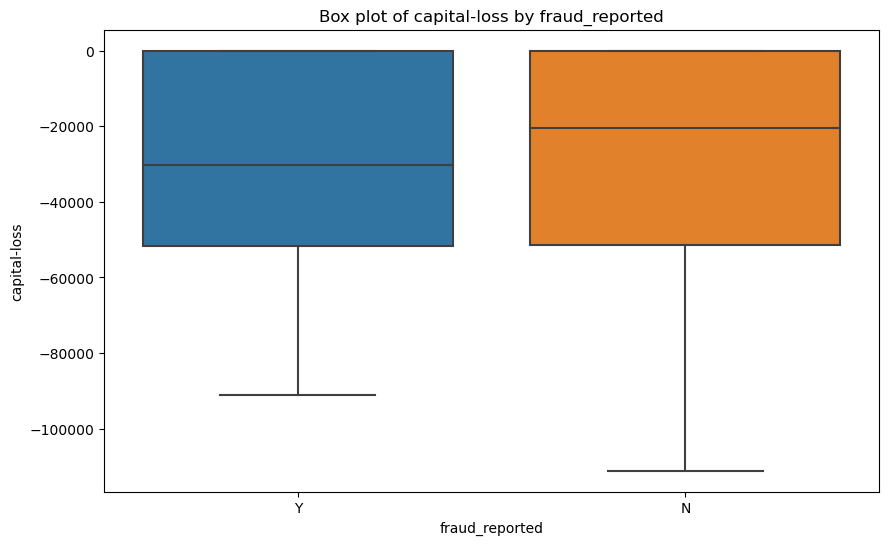

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


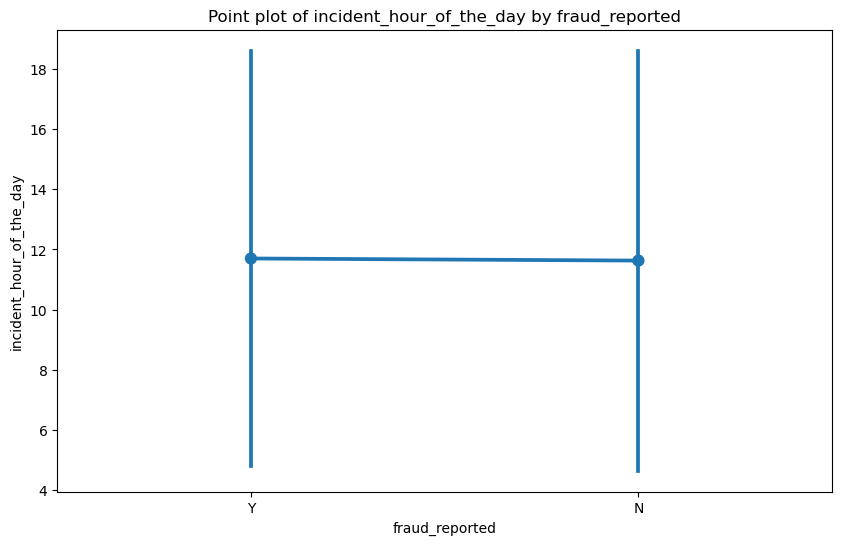

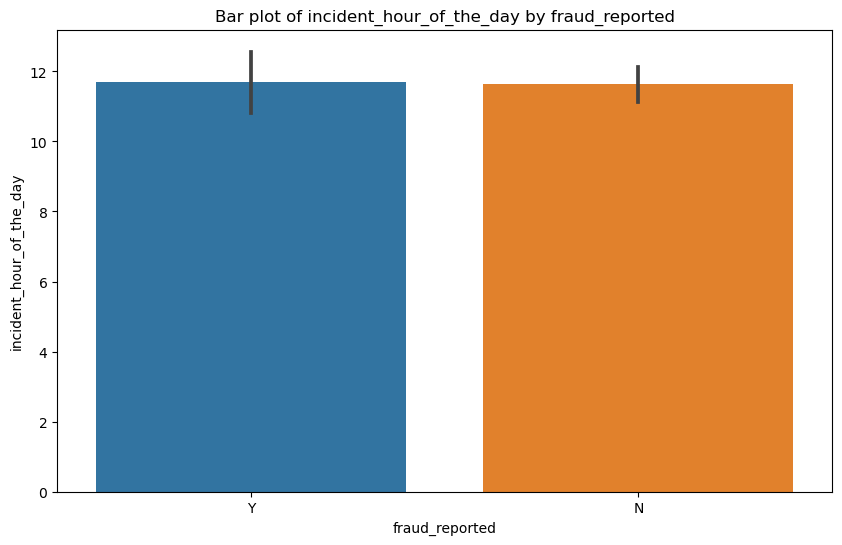

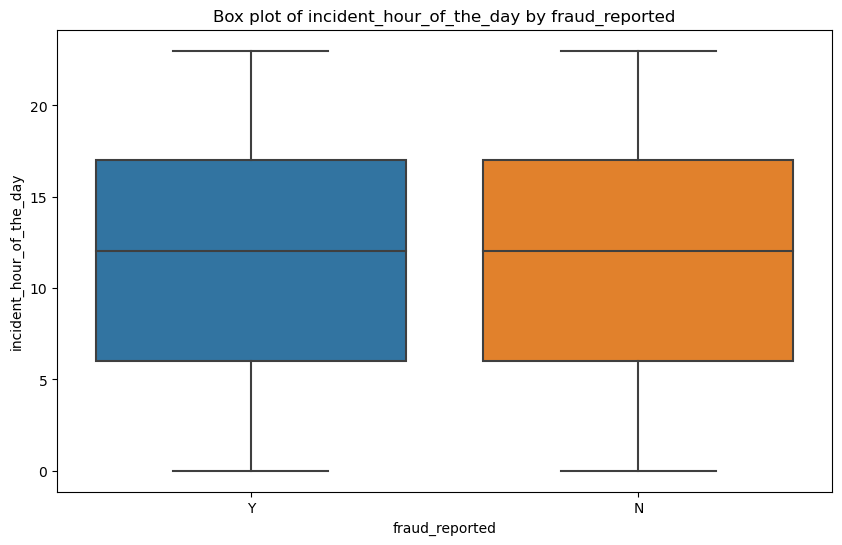

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


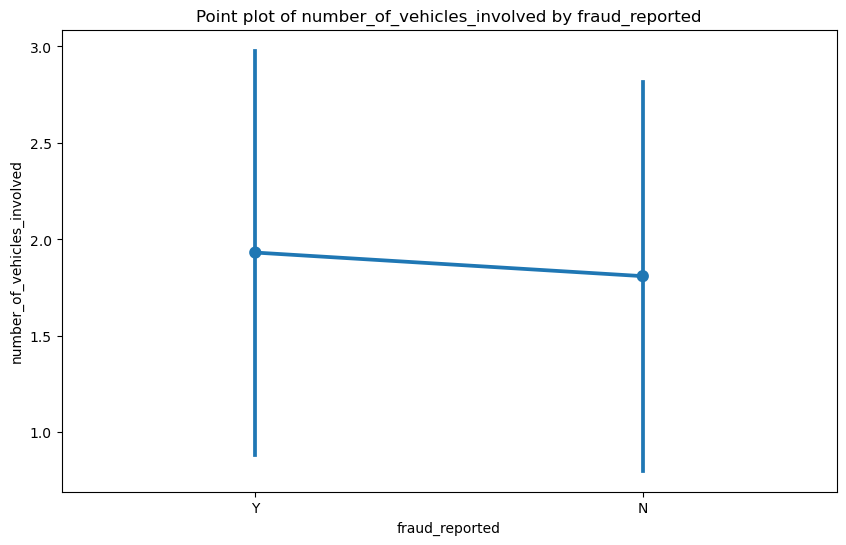

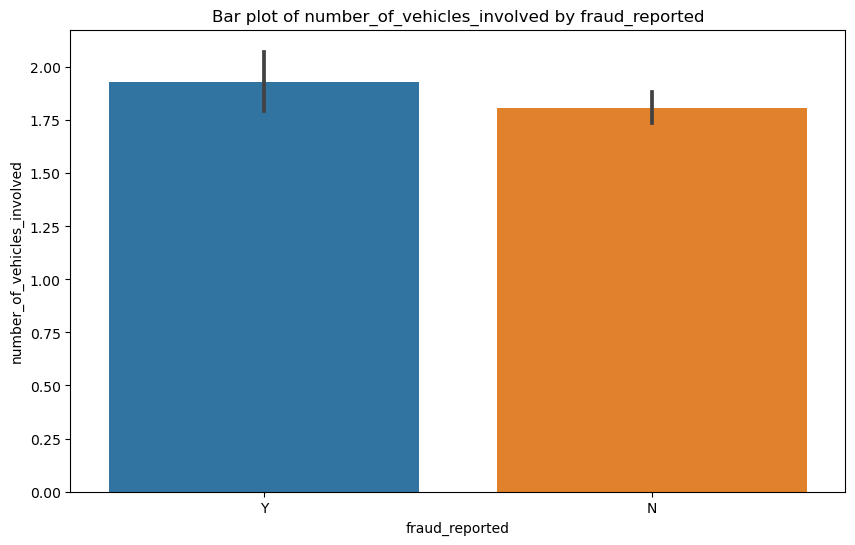

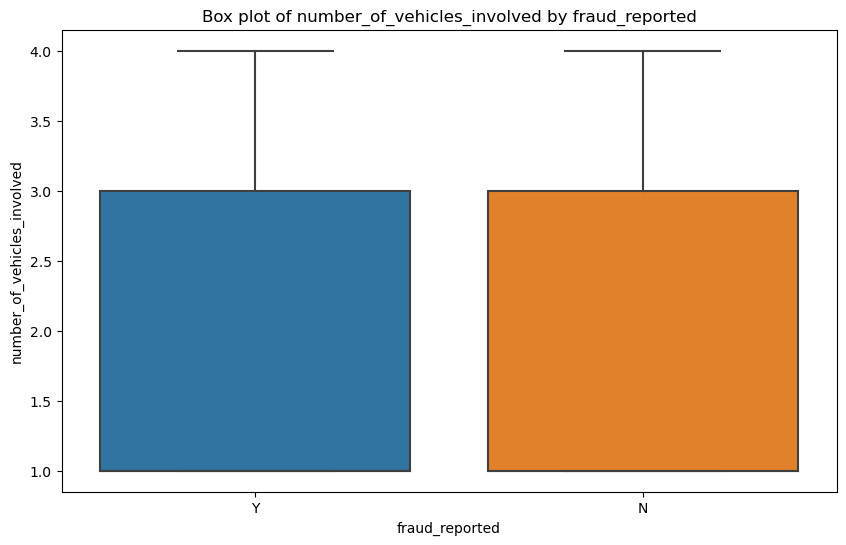

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


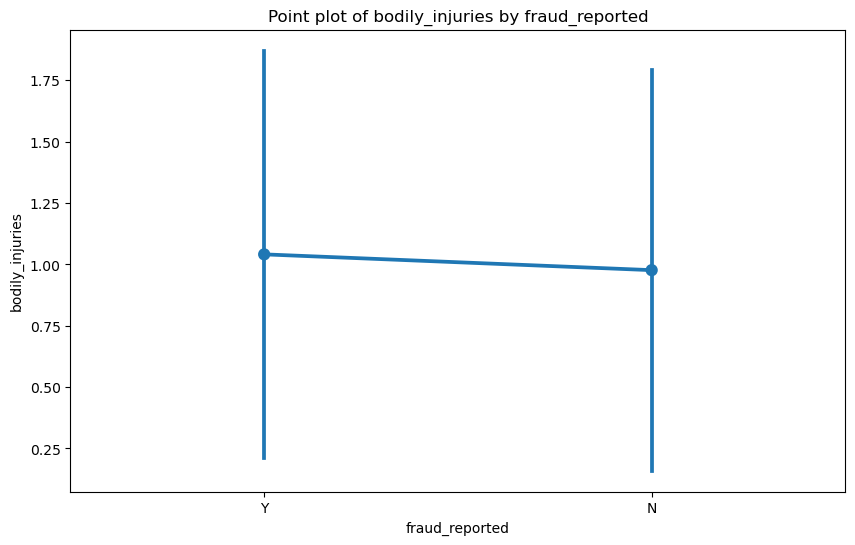

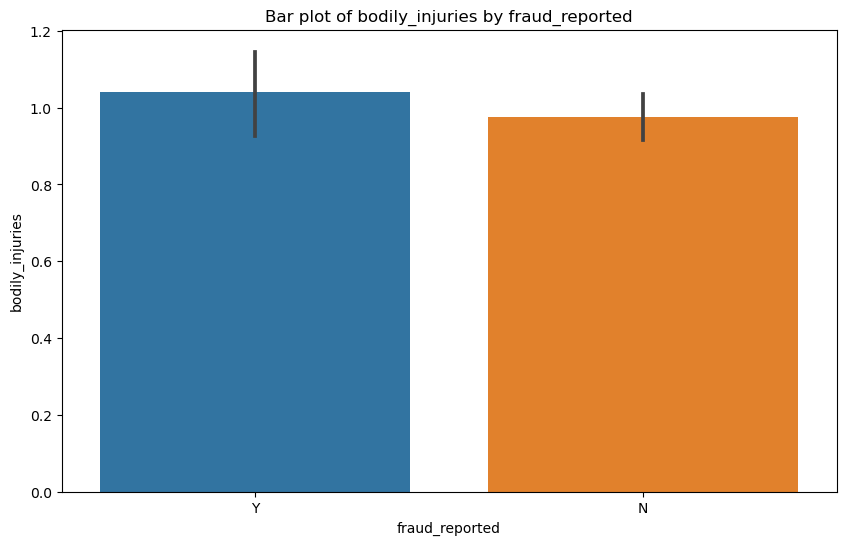

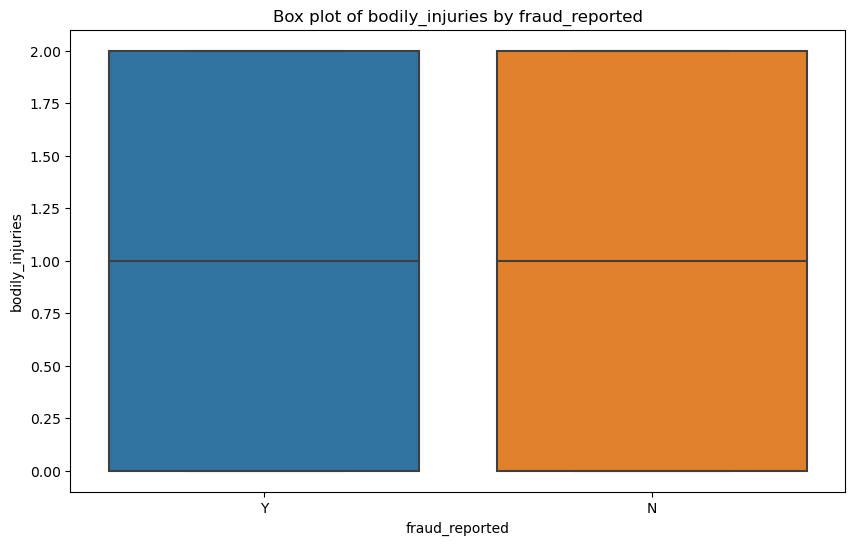

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


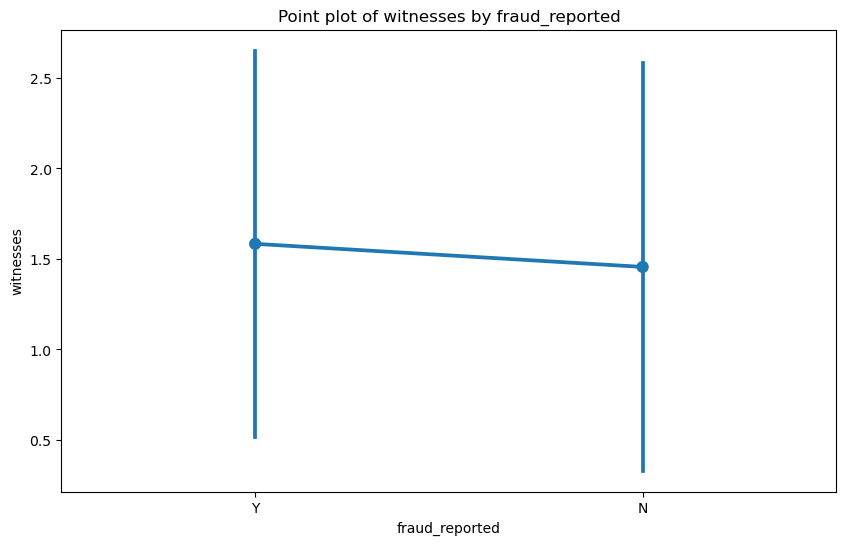

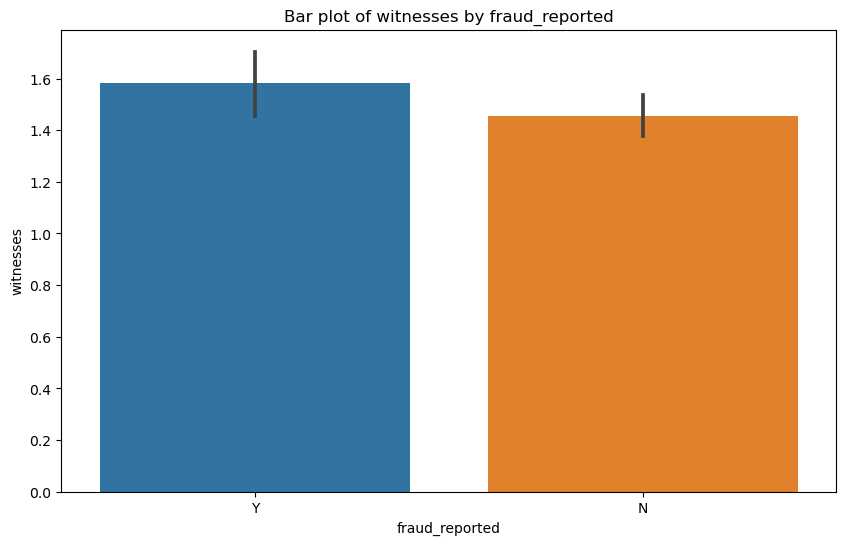

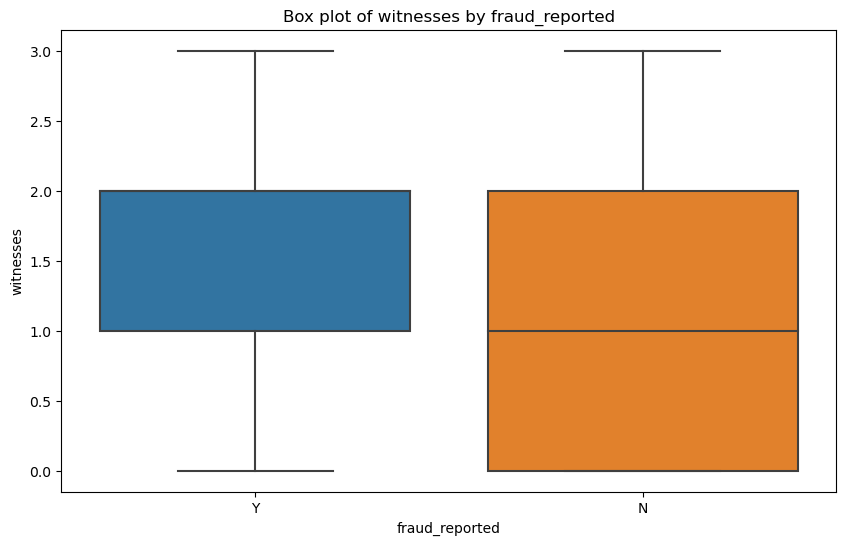

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


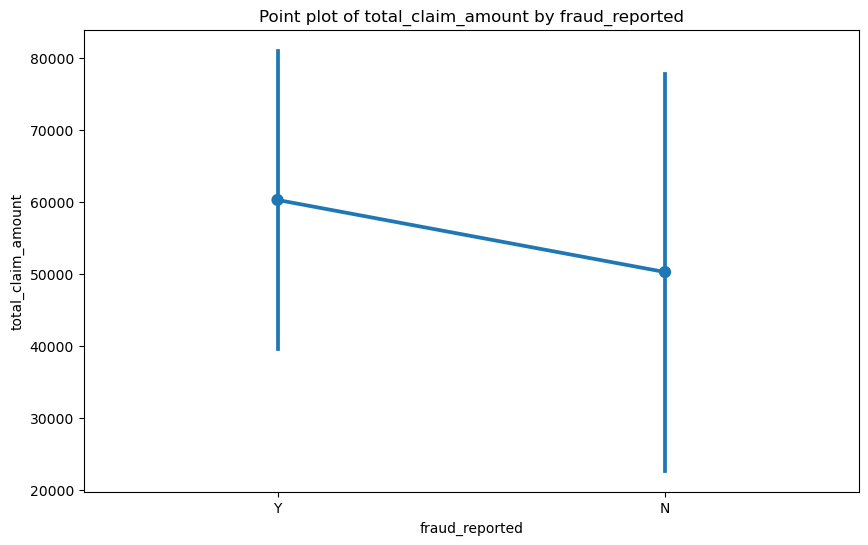

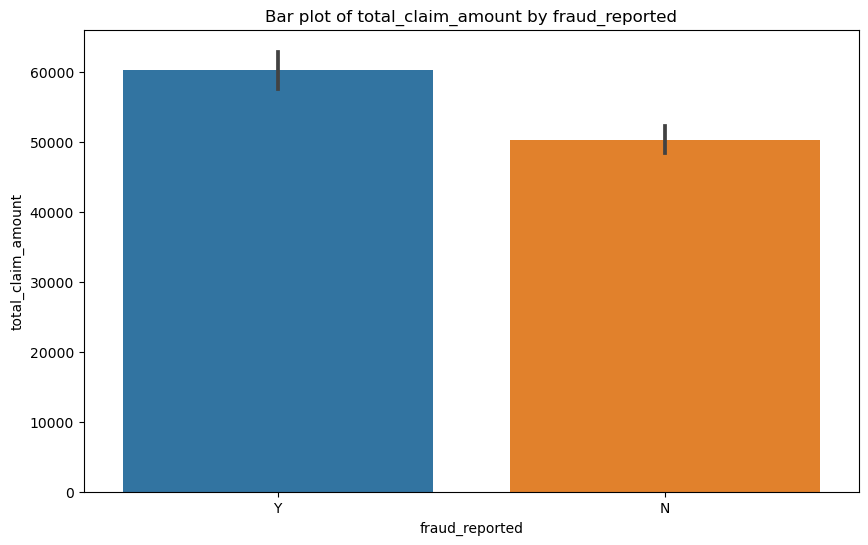

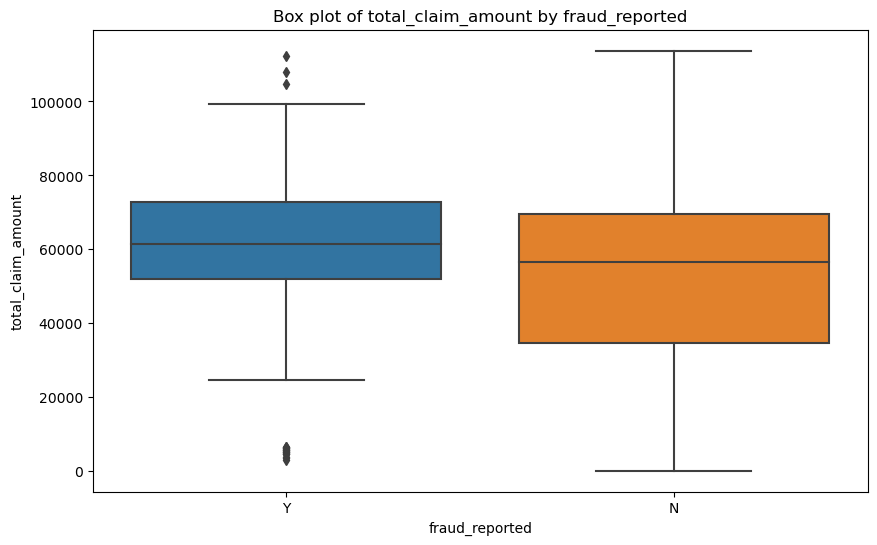

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


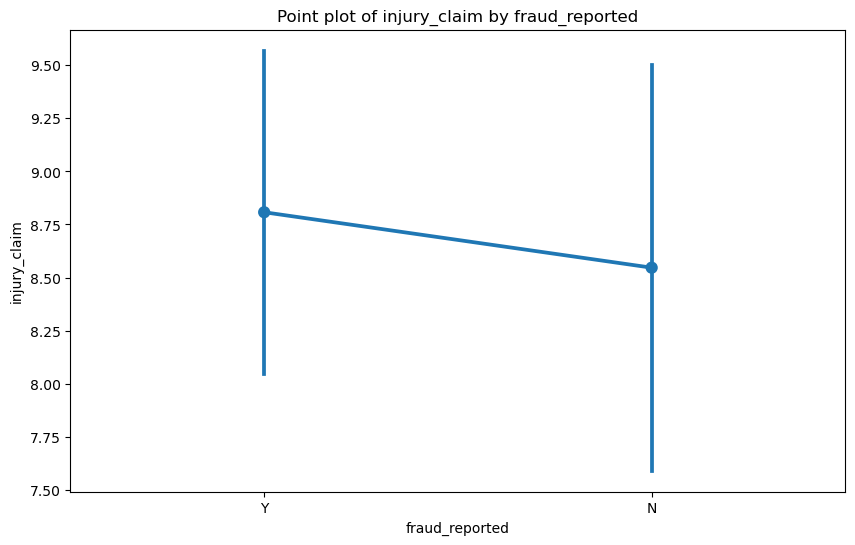

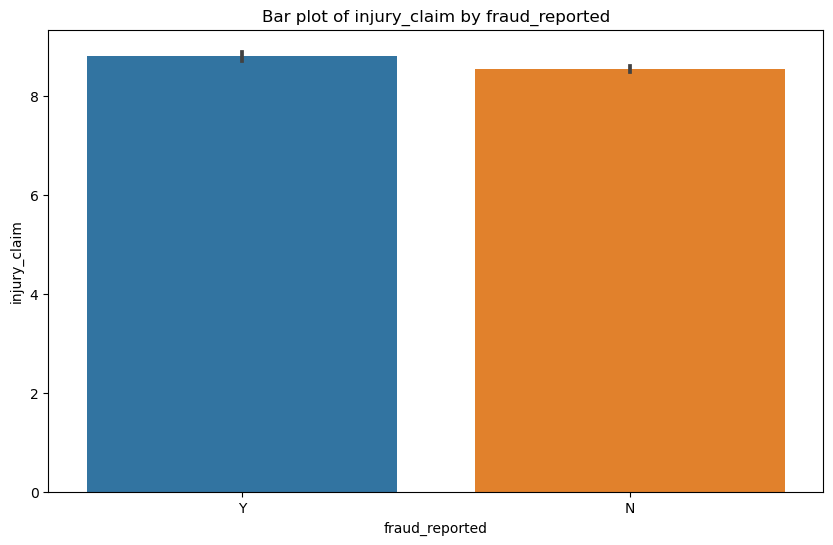

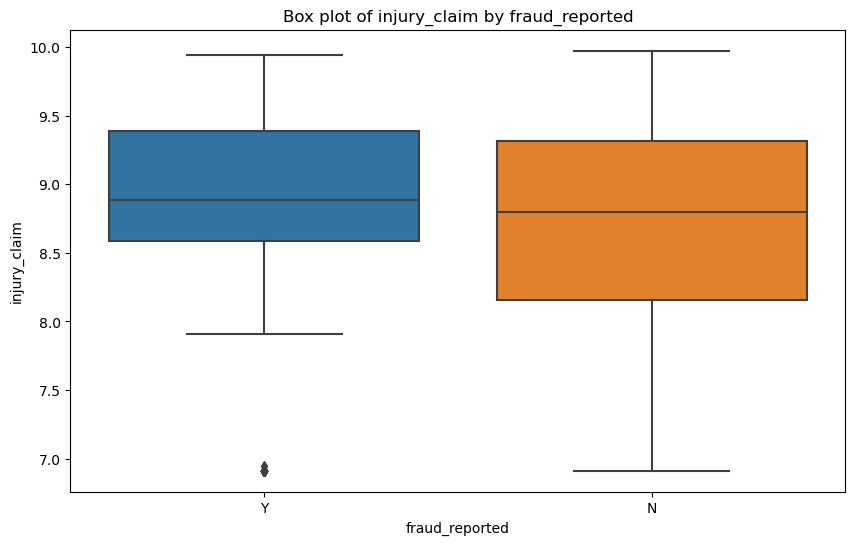

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


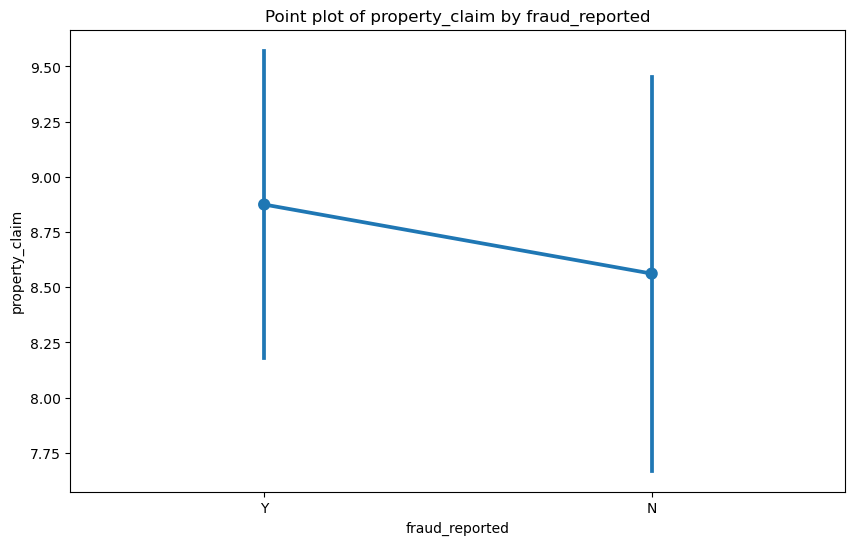

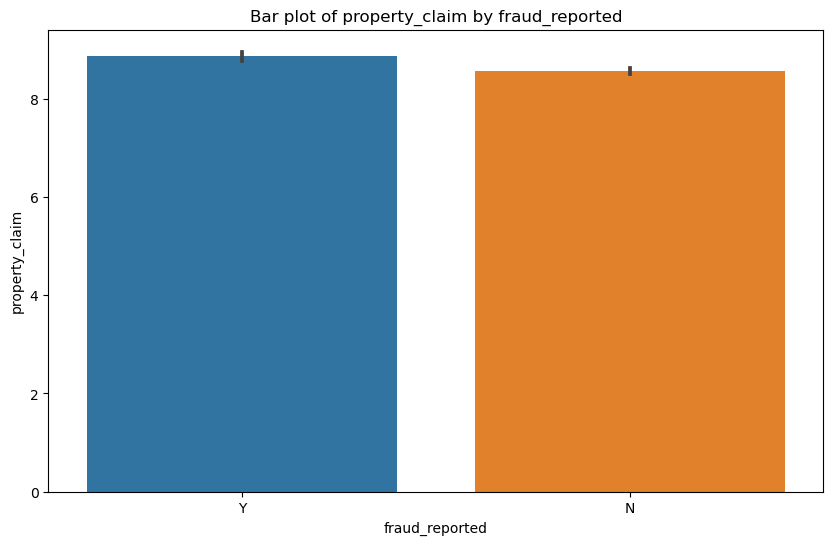

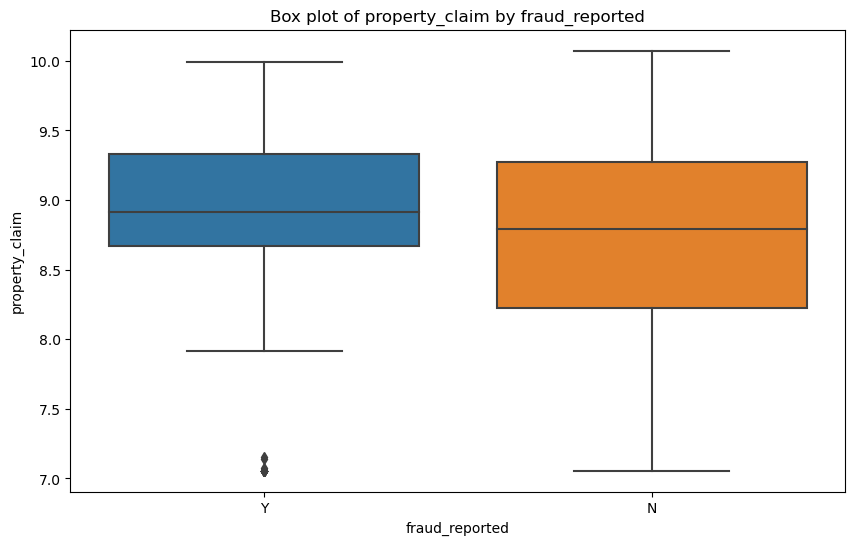

C:\Users\igomp\AppData\Local\Temp\ipykernel_7008\2606950865.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=target_column, y=col, data=df, ci="sd")


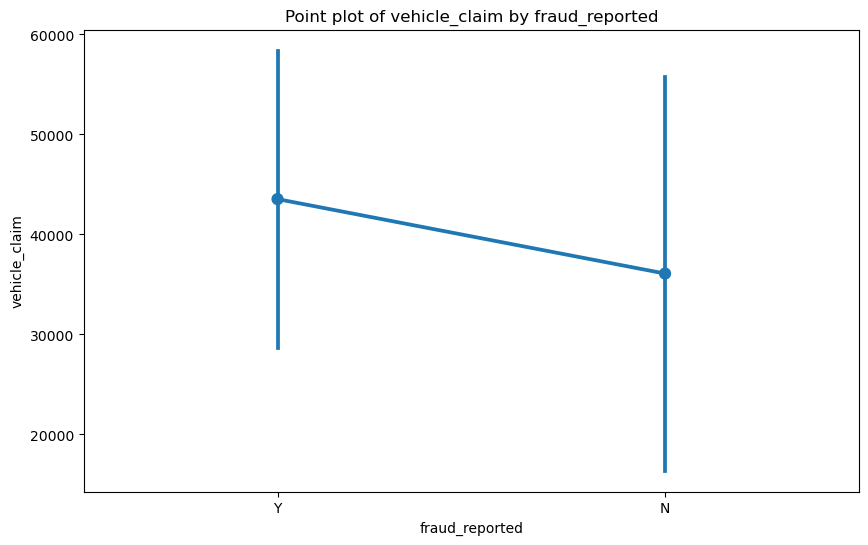

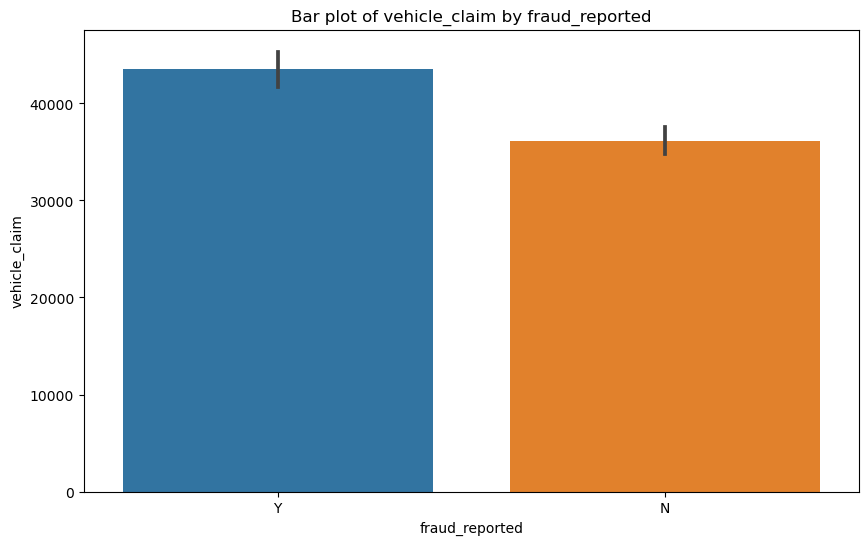

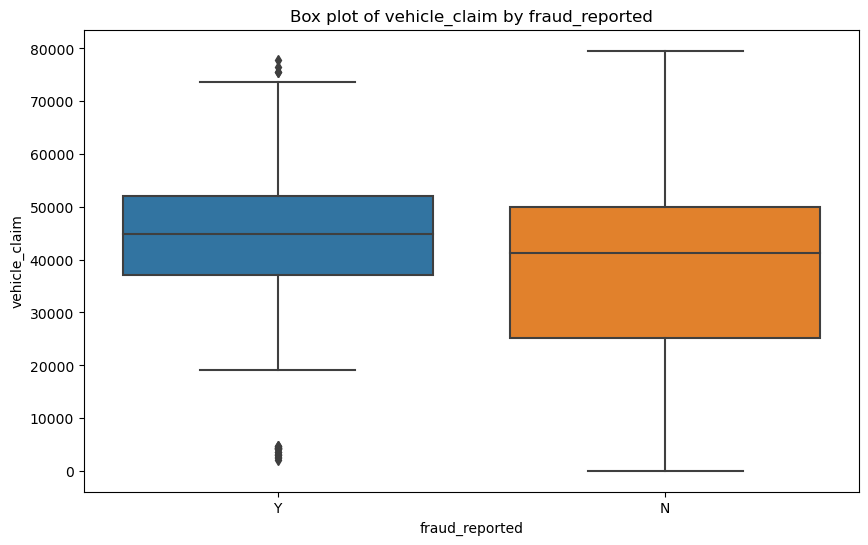

In [37]:
plot_numerical_eda(df2,numerical_EDA,categorical_EDA[-1])

In [38]:
df['capital-loss'].value_counts()

capital-loss
 0         475
-31700       5
-53700       5
-50300       5
-45300       4
-51000       4
-32800       4
-53800       4
-49200       4
-31400       4
-61400       4
-42700       3
-78600       3
-62400       3
-41200       3
-50000       3
-51800       3
-33300       3
-56200       3
-66200       3
-49400       3
-53300       3
-44500       3
-61000       3
-46900       3
-41400       3
-67800       3
-45100       3
-58900       3
-51500       3
-58400       3
-68200       3
-49500       3
-49000       3
-45800       3
-67400       3
-49300       3
-39300       3
-48800       3
-64500       3
-55600       3
-40900       2
-59500       2
-44800       2
-39100       2
-44400       2
-15700       2
-54600       2
-32300       2
-33100       2
-52100       2
-63900       2
-47100       2
-52600       2
-63700       2
-72100       2
-70300       2
-32500       2
-49700       2
-70900       2
-72500       2
-39700       2
-35200       2
-48700       2
-42100       2
-48500      

In [39]:
df['umbrella_limit'].value_counts()

umbrella_limit
 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: count, dtype: int64

# Encoding And Scaling

In [40]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [41]:
# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test, label_encoder_y):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=label_encoder_y.classes_, yticklabels=label_encoder_y.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [42]:
# Define features and target variable
X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']

In [43]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Label encoding for categorical features
categorical_columns = ['policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship',
                       'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'property_damage',
                       'police_report_available']
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    X_test[col] = label_encoders[col].transform(X_test[col])

In [45]:
# Label encoding for the target variable
label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)

In [46]:
# Standard scaling for numerical features
numerical_columns = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains',
                     'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
                     'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


In [47]:
# Apply SMOTE to handle class imbalance in the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_encoded)

In [48]:
selected_features = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains',
                     'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
                     'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_csl', 'insured_sex',
                     'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type',
                     'incident_severity', 'authorities_contacted', 'property_damage', 'police_report_available']

# Selecting features for training from balanced data
X_train_selected = X_train_balanced[selected_features]
X_test_selected = X_test[selected_features]


Logistic Regression:
Accuracy: 0.7
Precision: 0.7291734905557375
Recall: 0.7
F1 Score: 0.7102884949600278

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       145
           1       0.46      0.60      0.52        55

    accuracy                           0.70       200
   macro avg       0.65      0.67      0.65       200
weighted avg       0.73      0.70      0.71       200



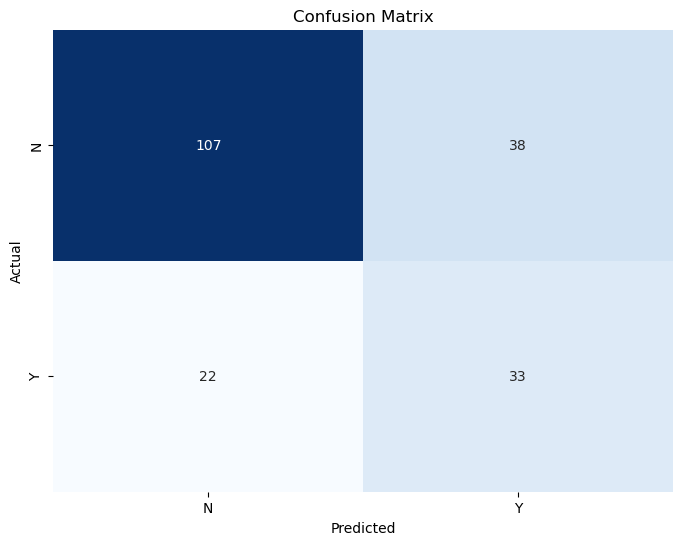

In [49]:
# Logistic Regression
print("\nLogistic Regression:")
log_reg = LogisticRegression(random_state=42)
evaluate_model(log_reg, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded, label_encoder_y)


Decision Tree Classifier:
Accuracy: 0.785
Precision: 0.791607142857143
Recall: 0.785
F1 Score: 0.7877879481311976

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       145
           1       0.60      0.65      0.63        55

    accuracy                           0.79       200
   macro avg       0.73      0.74      0.74       200
weighted avg       0.79      0.79      0.79       200



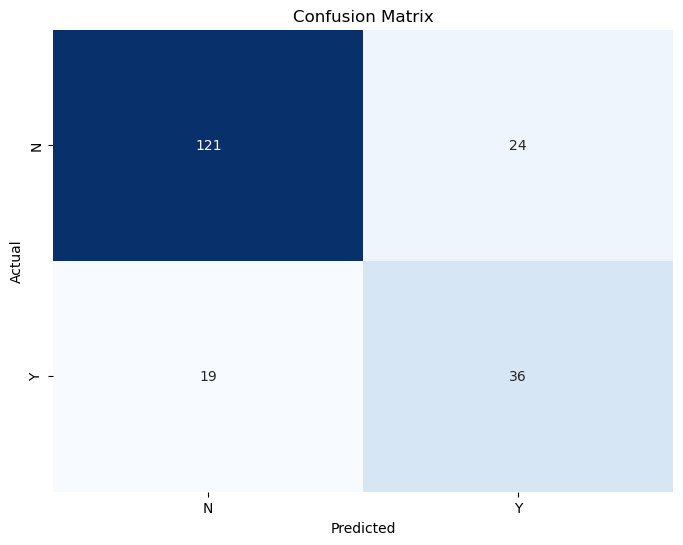

In [50]:
# Decision Tree Classifier
print("\nDecision Tree Classifier:")
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
evaluate_model(dt_classifier, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded, label_encoder_y)


Random Forest Classifier:
Accuracy: 0.765
Precision: 0.7588333333333332
Recall: 0.765
F1 Score: 0.7613962873284907

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       145
           1       0.58      0.53      0.55        55

    accuracy                           0.77       200
   macro avg       0.70      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200



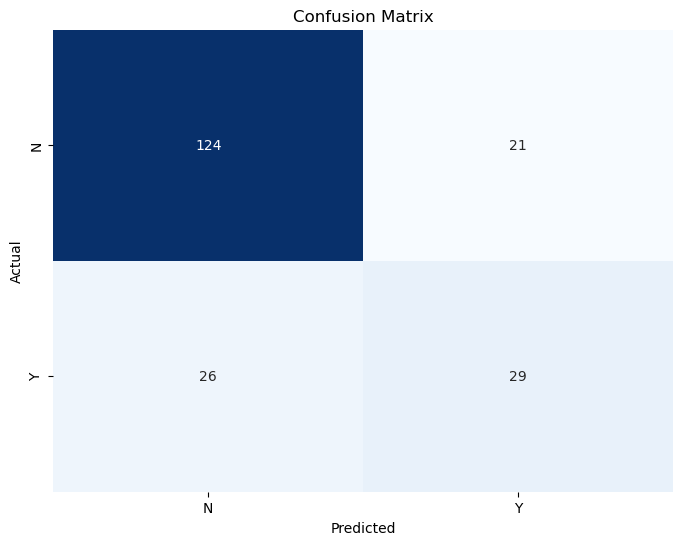

In [51]:
# Random Forest Classifier
print("\nRandom Forest Classifier:")
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
evaluate_model(rf_classifier, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded, label_encoder_y)


Gradient Boosting Classifier:
Accuracy: 0.74
Precision: 0.7291197329995829
Recall: 0.74
F1 Score: 0.7332938544545335

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       145
           1       0.53      0.45      0.49        55

    accuracy                           0.74       200
   macro avg       0.67      0.65      0.66       200
weighted avg       0.73      0.74      0.73       200



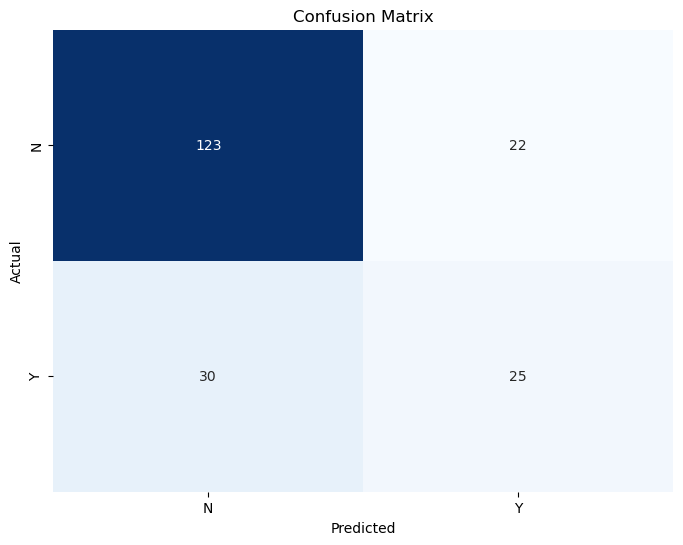

In [52]:
# Gradient Boosting Classifier
print("\nGradient Boosting Classifier:")
gb_classifier = GradientBoostingClassifier(random_state=42)
evaluate_model(gb_classifier, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded, label_encoder_y)




XGBoost Classifier:
Accuracy: 0.71
Precision: 0.6882880809940175
Recall: 0.71
F1 Score: 0.695531798245614

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       145
           1       0.46      0.35      0.40        55

    accuracy                           0.71       200
   macro avg       0.62      0.60      0.60       200
weighted avg       0.69      0.71      0.70       200



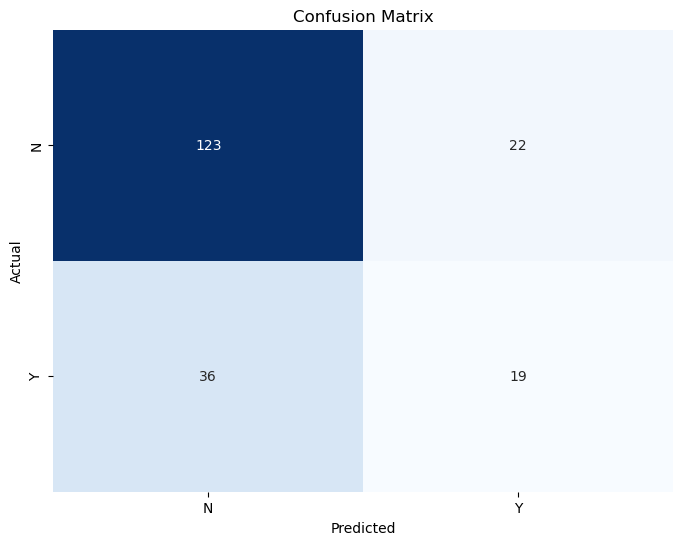

In [53]:
# XGBoost Classifier
print("\nXGBoost Classifier:")
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
evaluate_model(xgb_classifier, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded, label_encoder_y)




K-Nearest Neighbors Classifier:
Accuracy: 0.605
Precision: 0.6714963280293758
Recall: 0.605
F1 Score: 0.6247829896766066

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       145
           1       0.36      0.56      0.44        55

    accuracy                           0.60       200
   macro avg       0.57      0.59      0.57       200
weighted avg       0.67      0.60      0.62       200



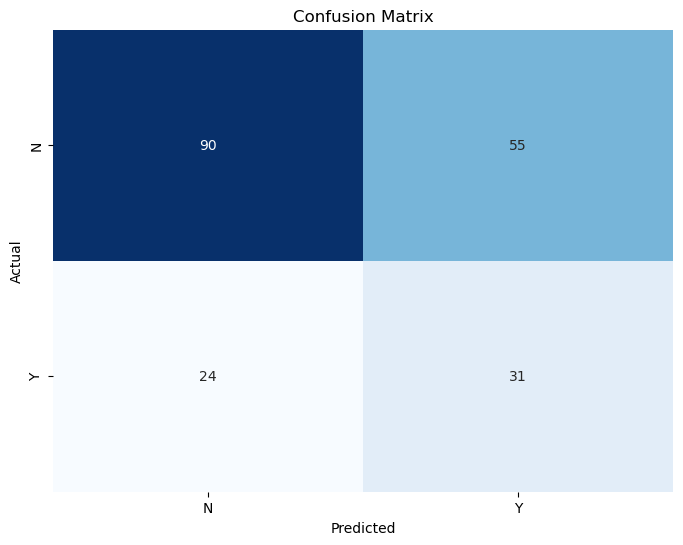

In [54]:
# K-Nearest Neighbors Classifier
print("\nK-Nearest Neighbors Classifier:")
knn_classifier = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_classifier, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded, label_encoder_y)

In [55]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [4],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_selected, y_train_balanced)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'best'}
Best Score: 0.8049982204543428


Accuracy: 0.775
Precision: 0.7762896825396826
Recall: 0.775
F1 Score: 0.7756242401571122

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       145
           1       0.59      0.60      0.59        55

    accuracy                           0.78       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.78      0.78      0.78       200



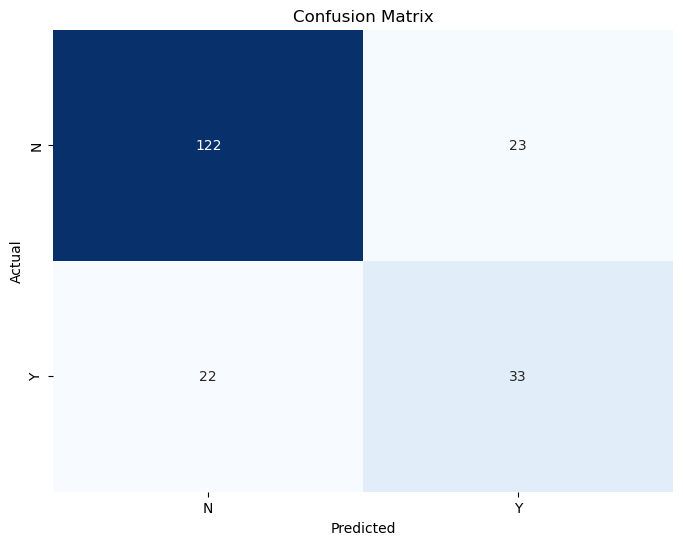

In [56]:
# Evaluate the best estimator on the test set
best_dt_classifier = grid_search.best_estimator_
evaluate_model(best_dt_classifier, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded, label_encoder_y)